## 1.Libraries

In [697]:
pip install plotly pandas


[notice] A new release of pip is available: 23.1.2 -> 23.2.1
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [504]:
pip install openpyxl


[notice] A new release of pip is available: 23.1.2 -> 23.2.1
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [187]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from collections import Counter
from wordcloud import WordCloud

import re
import tomotopy as tp
import numpy as np
import pandas as pd
import pyLDAvis
import tmplot
import warnings
import collections
import seaborn as sns
import matplotlib.pyplot as plt
import string

pd.options.mode.chained_assignment = None  # default='warn'

from rich.console import Console
from rich.table import Table
from tqdm import tqdm
from datetime import datetime, timedelta
from gensim.models.ldamodel import LdaModel
import plotly.express as px
from pandas.plotting import parallel_coordinates


## 2.Data loading

In [3]:
df = pd.read_csv('/Users/apple/Desktop/combined_final_3.csv')

In [4]:
df

Unnamed: 0                                            Comment  \
0             1.0  I'm not sure I have ever commented on a video,...   
1             2.0  I’ve always done the cup holder test in all my...   
2             3.0  I absolutely love the design of the Stelvio an...   
3             4.0  I believe the reason behind the column mounted...   
4             5.0  Finally! As a previous 4C Spider and now Giuli...   
...           ...                                                ...   
60678         NaN  I suppose we should be grateful that at least ...   
60679         NaN  Our first macan was a base on 21s with no Pasm...   
60680         NaN  For gen3, on the uk configurator PASM is not c...   
60681         NaN  Well that is another reason for avoiding the 2...   
60682         NaN  We don’t do too bad. At current exchange rates...   

                           Name              Date    Pos    Neg    Neu  \
0      \n @charlesconnor1737\n        3 years ago  0.207  0.070  0.723   
1             \n @gllegacy87\n        3 years ago  0.206  0.000  0.794   
2          \n @driftattack11\n        4 years ago  0.133  0.136  0.731   
3         \n @Black2005Lotus\n        4 years ago  0.100  0.082  0.818   
4          \n @DrachenBlasen\n        4 years ago  0.171  0.027  0.802   
...                         ...               ...    ...    ...    ...   
60678            Wing Commander  October 02, 2021    NaN    NaN    NaN   
60679                    sd1985  October 02, 2021    NaN    NaN    NaN   
60680                      BanZ  October 02, 2021    NaN    NaN    NaN   
60681                  Col Lamb  October 02, 2021    NaN    NaN    NaN   
60682            mark-yorkshire  October 02, 2021    NaN    NaN    NaN   

                    Model   Source  sentiment_score  
0      Alfa Romeo Stelvio  Youtube                5  
1      Alfa Romeo Stelvio  Youtube                4  
2      Alfa Romeo Stelvio  Youtube                2  
3      Alfa Romeo Stelvio  Youtube                4  
4      Alfa Romeo Stelvio  Youtube                5  
...                   ...      ...              ...  
60678       Porsche Macan   Forums                5  
60679       Porsche Macan   Forums                3  
60680       Porsche Macan   Forums                4  
60681       Porsche Macan   Forums                1  
60682       Porsche Macan   Forums                3  

[60683 rows x 10 columns]

# 3.Text pre-processing

## 3.1Remove Stopwords 

In [5]:
# Assuming df is your dataframe before preprocessing
df_original = df.copy()

In [7]:
nltk.download('stopwords')
nltk.download('punkt')

# Load stopwords
english_stops = set(stopwords.words('english'))

# You still need the stemmer for your actual text preprocessing, but not for the stopwords.
porter_stemmer = nltk.PorterStemmer().stem

# Keep the regex pattern for filtering non-words
pat = re.compile('^[a-z]{2,}$')

# Remove rows with NaN values in the 'Comment' column
df.dropna(subset=['Comment'], inplace=True)

# Convert any non-string entries in the 'Comment' column to string
df['Comment'] = df['Comment'].astype(str)

# Tokenize the text
tokenized_comments = df['Comment'].apply(word_tokenize)

# Convert tokens to lowercase
lowercased_comments = tokenized_comments.apply(lambda words: [word.lower() for word in words])

# Remove punctuation and non-words
filtered_comments = lowercased_comments.apply(lambda words: [word for word in words if word not in string.punctuation and pat.match(word)])

# Remove stopwords
no_stopwords_comments = filtered_comments.apply(lambda words: [word for word in words if word not in english_stops])

# Stem the words
stemmed_comments = no_stopwords_comments.apply(lambda words: [porter_stemmer(word) for word in words])

# Convert lists of words back to strings
df['Processed_Comment'] = stemmed_comments.apply(' '.join)

[nltk_data] Downloading package stopwords to /Users/apple/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /Users/apple/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [8]:
df['Processed_Comment']

0        sure ever comment video want say video convinc...
1        alway done cup holder test car buy differ conc...
2        absolut love design stelvio giulia giulia woul...
3        believ reason behind column mount shifter trad...
4        final previou spider giulia quadrifoglio owner...
                               ...                        
60678     suppos grate least porsch still allow us buy car
60679    first macan base pasm air realli like come inf...
60680    uk configur pasm current option base macan sta...
60681    well anoth reason avoid shout buy macan wheel ...
60682    bad current exchang rate germani seem spec als...
Name: Processed_Comment, Length: 60197, dtype: object

In [9]:
for idx, i in enumerate(df['Processed_Comment']):
    check = 0
    for k in df['Processed_Comment'].iloc[idx].split():
        if k in english_stops:
            check = 1
            print(k, end=" ")
    if check == 1:
        print(idx)
        

under 20
other 25
other 28
own 65
own 115
own 134
own 309
own 404
own 450
own 483
that 484
own 485
own 486
own own 492
own 499
own own 503
own 542
own 564
own 567
own 569
own 599
own own 754
own 769
can 844
your 858
own 879
that 885
own 1050
own 1077
own 1186
up 1206
that 1227
that 1466
own 1477
up 1662
own 1719
other 1894
other 1946
other 2003
other 2107
own 2189
your 2197
own 2315
own 2366
that 2384
what 2385
that 2410
what 2603
other 2892
own 3018
other 3061
own 3224
own 3251
over 3509
out 3557
all 3565
that 3615
own 3695
other 3702
out 3756
own 3771
other 3785
own 3793
other 4007
where 4023
that 4111
own 4265
own 4306
that 4471
up 4541
what 4613
that 4641
under 4896
where 5201
what 5223
own 5404
ma 5420
own 5464
that 5549
that 5565
that 5570
you you you 5628
that 5657
up 5751
there 5966
that 5991
other 5999
other 6087
that 6149
over 6321
that 6398
what 6436
what 6440
where 6481
up up 6487
other 6618
own 6674
she 6728
own 6889
own 7030
that 7032
that 7037
own 7050
that 7052
that 705

In [10]:
# 從 Processed_Comment 中提取所有獨特詞彙
unique_words = set()
df['Processed_Comment'].str.split().apply(unique_words.update)

# 與停用詞列表進行比對
stopwords_in_data = unique_words.intersection(english_stops)

if stopwords_in_data:
    print(f"Found {len(stopwords_in_data)} stopwords in the processed data: {stopwords_in_data}")
else:
    print("No stopwords found in the processed data!")


Found 52 stopwords in the processed data: {'have', 're', 'to', 'just', 'off', 'on', 'over', 'where', 'are', 'will', 'all', 'ma', 'the', 'an', 'with', 'under', 'what', 'not', 'other', 'at', 'which', 'my', 'own', 'until', 'so', 'you', 'we', 'down', 'be', 'up', 'but', 'me', 'how', 'through', 'in', 'and', 'below', 'no', 'do', 'if', 'who', 'can', 'there', 'here', 'that', 'she', 'these', 'same', 'about', 'am', 'your', 'out'}


In [11]:
def remove_stopwords_from_text(text):
    words = text.split()
    return ' '.join(word for word in words if word not in english_stops)

# 更新含有停用詞的條目，只移除停用詞
df['Processed_Comment'] = df['Processed_Comment'].apply(remove_stopwords_from_text)

# 再次檢查資料集中是否還存在停用詞
remaining_stopwords = set()
df['Processed_Comment'].str.split().apply(remaining_stopwords.update)
stopwords_after_removal = remaining_stopwords.intersection(english_stops)

if stopwords_after_removal:
    print(f"Found {len(stopwords_after_removal)} stopwords in the processed data after removal: {stopwords_after_removal}")
else:
    print("No stopwords found in the processed data after removal!")


No stopwords found in the processed data after removal!


In [163]:
# Now, let's compare a sample of 5 rows (you can adjust this number as needed)
sample_rows = df.sample(3).index  # Sample 5 random rows

for row in sample_rows:
    print("Row:", row)
    print("Original Text:")
    print(df_original.loc[row, 'Comment'])  # Original text
    print("\nPreprocessed Text:")
    print(df.loc[row, 'Processed_Comment'])  # Processed text
    print('-' * 80)

Row: 33922
Original Text:
Me too. Couldn't do battery registration with Carista so went to local vw audi specialist. £20. (Watched it done, it isn't simple).

Preprocessed Text:
could batteri registr carista went local vw audi specialist watch done simpl
--------------------------------------------------------------------------------
Row: 44858
Original Text:
The usual first service - Oil, filter, brake fluid......    The difference in prices are just ridiculous!

Preprocessed Text:
usual first servic oil filter brake fluid differ price ridicul
--------------------------------------------------------------------------------
Row: 43535
Original Text:
Car fixed. Faulty air conditioning pressure sensor replaced under warranty. A few cars have had this issue apparently so they knew what to look for.And from the OPC it's nothing to do with pressing the wrong knobs and you don't have to have the A/C on all the time to make it work properly (nor have to have a pano for it to work properly eit

## 3.2 Remove high-frequency words that appear more than 5,000 times

In [160]:
from collections import Counter

# 計算每個詞的頻率
word_freq = Counter()
df['Processed_Comment'].str.split().apply(word_freq.update)

# 查看最常見的50個詞
common_words = word_freq.most_common(50)
print(common_words)


[('said', 4939), ('bmw', 4549), ('dealer', 4484), ('know', 4270), ('macan', 4266), ('need', 4245), ('see', 4175), ('also', 4049), ('wheel', 3954), ('back', 3805), ('porsch', 3751), ('want', 3725), ('thank', 3683), ('got', 3681), ('much', 3642), ('make', 3633), ('order', 3584), ('work', 3554), ('say', 3393), ('could', 3364), ('still', 3349), ('realli', 3314), ('mile', 3295), ('option', 3258), ('chang', 3209), ('audi', 3051), ('servic', 3045), ('well', 3029), ('better', 3023), ('engin', 3013), ('even', 2995), ('issu', 2995), ('sure', 2937), ('way', 2936), ('come', 2920), ('seem', 2856), ('price', 2849), ('differ', 2838), ('stelvio', 2788), ('take', 2778), ('tri', 2758), ('day', 2718), ('first', 2683), ('buy', 2667), ('week', 2648), ('thing', 2584), ('great', 2565), ('last', 2496), ('seat', 2492), ('around', 2442)]


In [14]:
# Flatten the list of words and count occurrences
all_words = [word for sublist in stemmed_comments for word in sublist]
word_freq = collections.Counter(all_words)

# Find words that appear more than 5000 times
high_freq_words = {word for word, count in word_freq.items() if count > 5000}

print(f"High frequency words removed: {', '.join(high_freq_words)}")

def remove_high_freq(words):
    return ' '.join([word for word in words.split() if word not in high_freq_words])

df['Processed_Comment'] = df['Processed_Comment'].apply(remove_high_freq)

# 要檢查的詞彙列表
words_to_check = ['car', 'good', 'get', 'year', 'would', 'look', 'like', 'go', 'think', 'time', 'new', 'one', 'use', 'drive']

# 檢查每個詞彙
for word in words_to_check:
    if df['Processed_Comment'].str.contains(r'\b' + word + r'\b', case=False, regex=True).any():
        print(f"'{word}' is still present in the Processed_Comment column.")
    else:
        print(f"'{word}' is NOT present in the Processed_Comment column.")

High frequency words removed: think, good, one, get, would, year, look, new, drive, time, use, car, go, like
'car' is NOT present in the Processed_Comment column.
'good' is NOT present in the Processed_Comment column.
'get' is NOT present in the Processed_Comment column.
'year' is NOT present in the Processed_Comment column.
'would' is NOT present in the Processed_Comment column.
'look' is NOT present in the Processed_Comment column.
'like' is NOT present in the Processed_Comment column.
'go' is NOT present in the Processed_Comment column.
'think' is NOT present in the Processed_Comment column.
'time' is NOT present in the Processed_Comment column.
'new' is NOT present in the Processed_Comment column.
'one' is NOT present in the Processed_Comment column.
'use' is NOT present in the Processed_Comment column.
'drive' is NOT present in the Processed_Comment column.


## 3.3 Filter the dataset based on the length of the comments

In [15]:
# Count comments with text length less than 2 characters
short_comments_count = len(df[df['Processed_Comment'].str.len() <= 2])
print(f"Number of comments with length less than or equal to 2: {short_comments_count}")

# Now, delete those comments
df = df[df['Processed_Comment'].str.len() > 2]

Number of comments with length less than or equal to 2: 732


In [16]:
df

Unnamed: 0                                            Comment  \
0             1.0  I'm not sure I have ever commented on a video,...   
1             2.0  I’ve always done the cup holder test in all my...   
2             3.0  I absolutely love the design of the Stelvio an...   
3             4.0  I believe the reason behind the column mounted...   
4             5.0  Finally! As a previous 4C Spider and now Giuli...   
...           ...                                                ...   
60678         NaN  I suppose we should be grateful that at least ...   
60679         NaN  Our first macan was a base on 21s with no Pasm...   
60680         NaN  For gen3, on the uk configurator PASM is not c...   
60681         NaN  Well that is another reason for avoiding the 2...   
60682         NaN  We don’t do too bad. At current exchange rates...   

                           Name              Date    Pos    Neg    Neu  \
0      \n @charlesconnor1737\n        3 years ago  0.207  0.070  0.723   
1             \n @gllegacy87\n        3 years ago  0.206  0.000  0.794   
2          \n @driftattack11\n        4 years ago  0.133  0.136  0.731   
3         \n @Black2005Lotus\n        4 years ago  0.100  0.082  0.818   
4          \n @DrachenBlasen\n        4 years ago  0.171  0.027  0.802   
...                         ...               ...    ...    ...    ...   
60678            Wing Commander  October 02, 2021    NaN    NaN    NaN   
60679                    sd1985  October 02, 2021    NaN    NaN    NaN   
60680                      BanZ  October 02, 2021    NaN    NaN    NaN   
60681                  Col Lamb  October 02, 2021    NaN    NaN    NaN   
60682            mark-yorkshire  October 02, 2021    NaN    NaN    NaN   

                    Model   Source  sentiment_score  \
0      Alfa Romeo Stelvio  Youtube                5   
1      Alfa Romeo Stelvio  Youtube                4   
2      Alfa Romeo Stelvio  Youtube                2   
3      Alfa Romeo Stelvio  Youtube                4   
4      Alfa Romeo Stelvio  Youtube                5   
...                   ...      ...              ...   
60678       Porsche Macan   Forums                5   
60679       Porsche Macan   Forums                3   
60680       Porsche Macan   Forums                4   
60681       Porsche Macan   Forums                1   
60682       Porsche Macan   Forums                3   

                                       Processed_Comment  
0      sure ever comment video want say video convinc...  
1      alway done cup holder test buy differ concern ...  
2      absolut love design stelvio giulia giulia list...  
3      believ reason behind column mount shifter trad...  
4      final previou spider giulia quadrifoglio owner...  
...                                                  ...  
60678       suppos grate least porsch still allow us buy  
60679  first macan base pasm air realli come inferior...  
60680  uk configur pasm current option base macan sta...  
60681  well anoth reason avoid shout buy macan wheel ...  
60682  bad current exchang rate germani seem spec als...  

[59465 rows x 11 columns]

In [17]:
# After preprocessing, let's say df contains the modified data.

# Now, let's compare a sample of 5 rows (you can adjust this number as needed)
sample_rows = df.sample(5).index  # Sample 5 random rows

for row in sample_rows:
    print("Row:", row)
    print("Original Text:")
    print(df_original.loc[row, 'Comment'])  # Original text
    print("\nPreprocessed Text:")
    print(df.loc[row, 'Processed_Comment'])  # Processed text
    print('-' * 80)

Row: 54365
Original Text:
Hundreds of colours available in gloss or metallic vinyl. I looked at the Carmine version out of interest and it matched exactly just as an example…

Preprocessed Text:
hundr colour avail gloss metal vinyl carmin version interest match exactli
--------------------------------------------------------------------------------
Row: 13992
Original Text:
Normally 10 litres for a tenner at Screwfix but they seem to be sold out right now.Probably more panic buying because the internet said there was a shortage in Australia!

Preprocessed Text:
normal litr tenner screwfix seem sold right panic buy internet said shortag australia
--------------------------------------------------------------------------------
Row: 40745
Original Text:
Mine was the 11th, now showing as in quality control! Better start trying to figure out how I'm going to pay for it I suppose.

Preprocessed Text:
mine show qualiti control better start tri figur pay suppos
--------------------------------

# 4.Define Function 

In [183]:

def convert_review_to_corpus(df_column):
    # Convert the preprocessed comments to a list
    processed_comments = df_column.tolist()

    # Create a Corpus
    corpus = tp.utils.Corpus()
    
    # Process the comments and add them to the corpus
    for doc in processed_comments:
        corpus.add_doc(words=doc.split())
        
    return corpus

def modeling(corpus):
    # model setup
    mdl = tp.LDAModel(min_df=5, rm_top=1, k=20, corpus=corpus)
    mdl.train(0)

    print('Num docs:{}, Num Vocabs:{}, Total Words:{}'.format(
        len(mdl.docs), len(mdl.used_vocabs), mdl.num_words
    ))
    print('Removed Top words: ', *mdl.removed_top_words)

    # model training
    for i in range(0, 1000, 20):
        print('Iteration: {:04}, LL per word: {:.4}'.format(i, mdl.ll_per_word))
        mdl.train(20)
    print('Iteration: {:04}, LL per word: {:.4}'.format(1000, mdl.ll_per_word))
    mdl.summary()
    
    return mdl

def result(corpus):
    
    # calculating coherence score and perplexity score
    coherence_scores = []  # To store average coherence scores for different numbers of topics
    perplexity_scores = []  # To store perplexity scores for different numbers of topics
    all_model = [] # To store each model for different numbers of topics
    
    highest_coherence = float("-inf")
    lowest_perplexity = float("inf")
    optimal_num_topics_coherence = None
    optimal_num_topics_perplexity = None
    optimal_model = None
    optimal_beta = None

    beta_value = [0.01, 0.05, 0.1]
    coherence_scores_by_eta = {}  # Store coherence scores for different eta values
    perplexity_scores_by_eta = {}  # Store perplexity scores for different eta values

    for val in beta_value:
        coherence_scores = []  # Store coherence scores for the current eta value
        perplexity_scores = []  # Store perplexity scores for the current eta value
        
        # change 1,5 to 1, 21
        for num_topics in range(1, 31):
            lda_model = tp.LDAModel(k=num_topics, corpus=corpus, eta=val, rm_top=10)

            for i in range(0, 1000, 20):
                lda_model.train(20)

            coh = tp.coherence.Coherence(lda_model, coherence="c_v")
            average_coherence = coh.get_score()
            coherence_scores.append(average_coherence)

            perplexity = lda_model.perplexity
            perplexity_scores.append(perplexity)
            
            if average_coherence > highest_coherence:
                highest_coherence = average_coherence
                optimal_num_topics_coherence = num_topics
                optimal_beta = val
                optimal_model = lda_model

            if perplexity < lowest_perplexity:
                lowest_perplexity = perplexity
                optimal_num_topics_perplexity = num_topics

        coherence_scores_by_eta[val] = coherence_scores
        perplexity_scores_by_eta[val] = perplexity_scores

    # Plot coherence scores for different eta values
    plt.figure(figsize=(10, 6))
    
    # change 1,5 to 1, 21
    for val, coh_scores in coherence_scores_by_eta.items():
        plt.plot(range(1, 31), coh_scores, marker='o', label=f'Coherence (eta = {val})')

    plt.xlabel("Number of Topics")
    plt.ylabel("Coherence Score")
    plt.title("Coherence Scores vs. Number of Topics for Different eta Values")
    plt.grid(True)
    plt.legend()
    plt.show()

    # Plot perplexity scores for different eta values
    plt.figure(figsize=(10, 6))

    # change 1,5 to 1, 21
    for val, perplexity_scores in perplexity_scores_by_eta.items():
        plt.plot(range(1, 31), perplexity_scores, marker='o', label=f'Perplexity (eta = {val})')

    plt.xlabel("Number of Topics")
    plt.ylabel("Perplexity Score")
    plt.title("Perplexity Scores vs. Number of Topics for Different eta Values")
    plt.grid(True)
    plt.legend()
    plt.show()

    print("------------------------------------------------")
    print("under eta value: ",optimal_beta, " Optimal number of topics for highest coherence: ", optimal_num_topics_coherence)
    print("Optimal number of topics for lowest perplexity:", optimal_num_topics_perplexity)
    
    return optimal_num_topics_coherence, optimal_model, coherence_scores_by_eta

def visualize_lda_model(mdl, optimal_number):

    # Get the topic-term distribution for the optimal topics
    topic_term_dists = np.stack([mdl.get_topic_word_dist(k) for k in range(optimal_number)])

    # Get the document-topic distribution for the optimal topics
    doc_topic_dists = np.stack([doc.get_topic_dist() for doc in mdl.docs])[:, :optimal_number]
    doc_topic_dists /= doc_topic_dists.sum(axis=1, keepdims=True)

    # Get the document lengths
    doc_lengths = np.array([len(doc.words) for doc in mdl.docs])

    # Get the vocabulary and term frequency
    vocab = list(mdl.used_vocabs)
    term_frequency = mdl.used_vocab_freq

    # 使用 tqdm 包装 pyLDAvis.prepare 函数，以便显示进度条
    with tqdm(total=5, desc="Preparing Data") as pbar:  # total 表示总步数
        prepared_data = pyLDAvis.prepare(
            topic_term_dists, 
            doc_topic_dists, 
            doc_lengths, 
            vocab, 
            term_frequency,
            start_index=0, 
            sort_topics=False 
        )
        pbar.update(1)  # 更新进度条步数
    return prepared_data

def keywords_analyze(optimal_num, corpus):
    
    lda = tp.LDAModel(k=optimal_num, corpus=corpus)
    for i in range(0, 1000, 20):
        lda.train(20)
    
    console = Console()
    table = Table(
        show_header=True,
        header_style="cyan",
        title="[bold] [cyan] Word to topic probabilities (top 10 words)[/cyan]",
        width=120)
    
    table.add_column("Topic", justify="center", style="cyan", width=8)
    table.add_column("W 1", width=12)
    table.add_column("W 2", width=12)
    table.add_column("W 3", width=12)
    table.add_column("W 4", width=12)
    table.add_column("W 5", width=12)
    table.add_column("W 6", width=12)
    table.add_column("W 7", width=12)
    table.add_column("W 8", width=12)
    table.add_column("W 9", width=12)
    table.add_column("W 10", width=12)
        
    for k in range(lda.k):                       # step 2 
        values = []
        for word, prob in lda.get_topic_words(k):
            values.append("{}\n({})\n".format(word, str(np.round(prob, 3))))       
        table.add_row(
            str(k),
            values[0],
            values[1],
            values[2],
            values[3],
            values[4],
            values[5],
            values[6],
            values[7],
            values[8],
            values[9],)
    print(table)
    return table


A lower negative log-likelihood value indicates that the model fits the data better, meaning that the documents generated by the model are closer to the actual observed documents. Therefore, when training an LDA model, the goal is to iteratively optimize the parameters in a way that reduces the negative log-likelihood value, leading to improved model performance.

# 5.1 Overall 

In [184]:
corpus_overall = convert_review_to_corpus(df['Processed_Comment'])

In [185]:
mdl_overall = modeling(corpus_overall)

Num docs:59465, Num Vocabs:7798, Total Words:990158
Removed Top words:  said
Iteration: 0000, LL per word: -11.42
Iteration: 0020, LL per word: -8.599
Iteration: 0040, LL per word: -8.318
Iteration: 0060, LL per word: -8.225
Iteration: 0080, LL per word: -8.179
Iteration: 0100, LL per word: -8.149
Iteration: 0120, LL per word: -8.129
Iteration: 0140, LL per word: -8.111
Iteration: 0160, LL per word: -8.096
Iteration: 0180, LL per word: -8.084
Iteration: 0200, LL per word: -8.075
Iteration: 0220, LL per word: -8.068
Iteration: 0240, LL per word: -8.06
Iteration: 0260, LL per word: -8.052
Iteration: 0280, LL per word: -8.049
Iteration: 0300, LL per word: -8.043
Iteration: 0320, LL per word: -8.04
Iteration: 0340, LL per word: -8.035
Iteration: 0360, LL per word: -8.034
Iteration: 0380, LL per word: -8.031
Iteration: 0400, LL per word: -8.027
Iteration: 0420, LL per word: -8.024
Iteration: 0440, LL per word: -8.02
Iteration: 0460, LL per word: -8.017
Iteration: 0480, LL per word: -8.015
I

## 5.1.1 Tuning beta under different Number of Topics

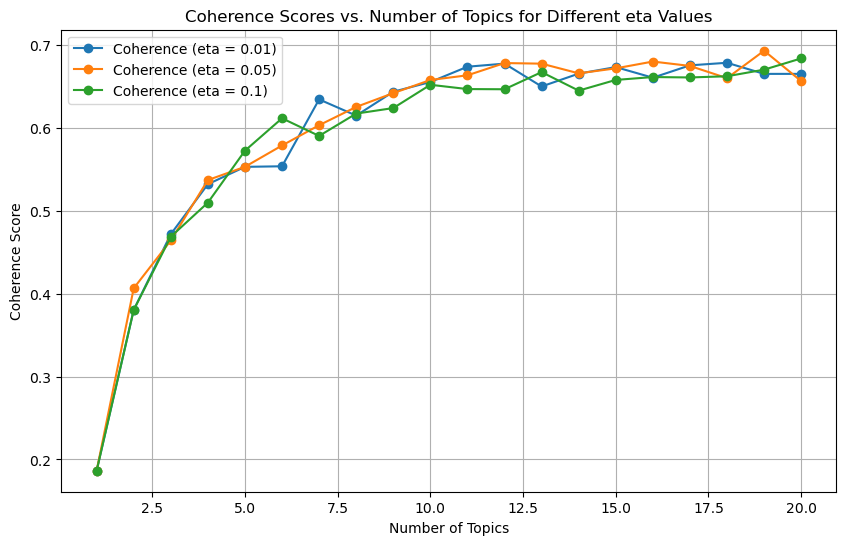

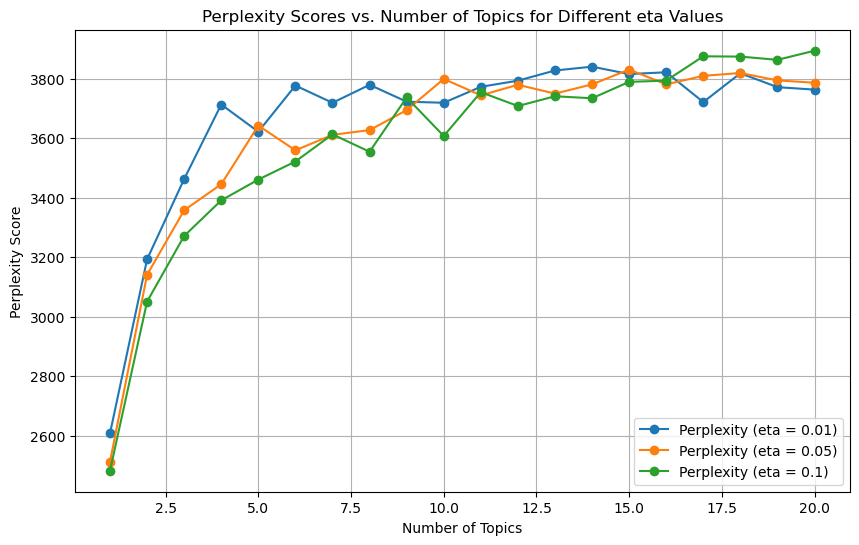

------------------------------------------------
under eta value:  0.05  Optimal number of topics for highest coherence:  19
Optimal number of topics for lowest perplexity: 1


In [178]:
coherence_topic_number_overall, optimal_model_overall, all_coherence_overall = result(corpus_overall)

In [48]:
# # Save the optimal model
# optimal_model_overall.save("mdl_overall", True)

In [174]:
optimal_model_overall = tp.LDAModel.load("mdl_overall")

## 5.1.2 Visualization

## pyLDAvis

In [25]:
# Call the function
prepared_data = visualize_lda_model(optimal_model_overall, 19)

# Display the visualization
pyLDAvis.display(prepared_data)

Preparing Data:  20%|█████▊                       | 1/5 [00:01<00:05,  1.42s/it]


In [26]:
pyLDAvis.save_html(prepared_data, 'ldavis.html')

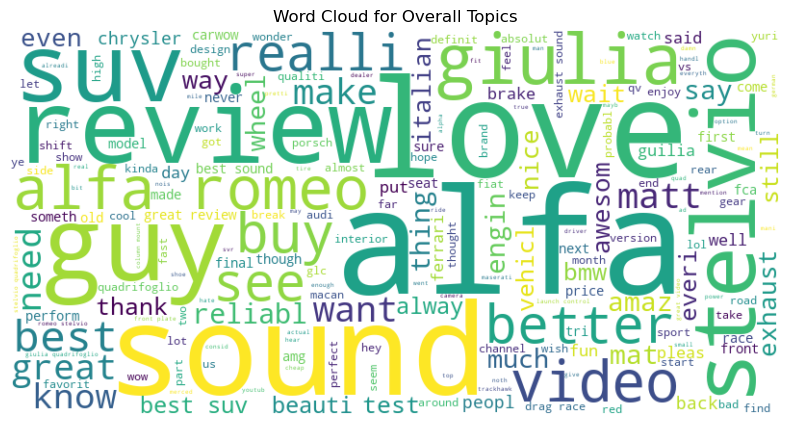

In [142]:
# Generate a word cloud for the overall topics
overall_topic_words = df[df['topic_overall'] > 0]['Processed_Comment'].str.cat(sep=' ')
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(overall_topic_words)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.title("Word Cloud for Overall Topics")
plt.axis('off')
plt.show()


## 5.1.3 keyword analyze 

In [37]:
# table = keywords_analyze(19, corpus_overall)
# table

In [536]:
#Loading the best model, displaying the results
best_mdl = tp.LDAModel.load("mdl_overall")

#Create an empty DataFrame
topic_words_df = pd.DataFrame(columns=["Topic"] + [f"Word_{i}" for i in range(1, 25)])

#Get the topic-word distribution and store the ten most important words for each topic
for topic_id in range(best_mdl.k):
    topic_words = best_mdl.get_topic_words(topic_id, top_n=24)
    words = [word for word, _ in topic_words]
    topic_words_df.loc[len(topic_words_df)] = [topic_id + 1] + words

# Print the DataFrame
print(topic_words_df)

    Topic   Word_1    Word_2    Word_3    Word_4   Word_5    Word_6   Word_7  \
0       1     open      door       key      lock     nois      issu     side   
1       2   option    packag  standard     order   system      spec    sport   
2       3  stelvio      alfa    giulia     romeo    veloc       red       qv   
3       4    sport      seat   suspens      mode  comfort      ride   differ   
4       5     make       buy     peopl    porsch      say      much     want   
5       6     rear       fit     front      seat     boot      side    plate   
6       7    thank      post     anyon     forum       hi      find     help   
7       8      day       got      last     never     week    realli     take   
8       9     mile      fuel       mpg     engin   diesel    petrol     tank   
9      10   review     video      love     sound    great      matt      mat   
10     11    order      week      wait  deliveri    build      date  product   
11     12    light     brake      turn  

In [69]:
# Loading the best model
best_mdl = tp.LDAModel.load("mdl_overall")

# Create an empty DataFrame to store topic-word distribution
topic_words_df = pd.DataFrame(columns=["Topic"] + [f"Word_{i}" for i in range(1, 25)])

# Get the topic-word distribution and store the top 24 words for each topic
for topic_id in range(best_mdl.k):
    topic_words = best_mdl.get_topic_words(topic_id, top_n=24)
    words = [word for word, _ in topic_words]
    topic_words_df.loc[len(topic_words_df)] = [topic_id + 1] + words

# Define the keywords_analyze function
def keywords_analyze(optimal_num, topic_words_df):
    console = Console()
    table = Table(
        show_header=True,
        header_style="cyan",
        title="[bold] [cyan] Word to topic (top 10 words)[/cyan]",
        width=120)
    
    table.add_column("Topic", justify="center", style="cyan", width=8)
    for i in range(1, 11):
        table.add_column(f"W {i}", width=12)
        
    for k in range(optimal_num):
        values = topic_words_df.iloc[k, 1:11].tolist()
        table.add_row(str(k + 1), *values)
        
    console.print(table)
    return table

# Call the function for keyword analysis
table = keywords_analyze(best_mdl.k, topic_words_df)


                                               Word to topic (top 10 words)                                        
┏━━━━━━┳━━━━━━━━━━┳━━━━━━━━━━┳━━━━━━━━━━┳━━━━━━━━━━┳━━━━━━━━━━┳━━━━━━━━━━┳━━━━━━━━━━┳━━━━━━━━━━━┳━━━━━━━━━━┳━━━━━━━
┃ Top… ┃ W 1      ┃ W 2      ┃ W 3      ┃ W 4      ┃ W 5      ┃ W 6      ┃ W 7      ┃ W 8       ┃ W 9      ┃ W 10  
┡━━━━━━╇━━━━━━━━━━╇━━━━━━━━━━╇━━━━━━━━━━╇━━━━━━━━━━╇━━━━━━━━━━╇━━━━━━━━━━╇━━━━━━━━━━╇━━━━━━━━━━━╇━━━━━━━━━━╇━━━━━━━
│  1   │ open     │ door     │ key      │ lock     │ nois     │ issu     │ side     │ rear      │ work     │ sound 
│  2   │ option   │ packag   │ standard │ order    │ system   │ spec     │ sport    │ steer     │ sound    │ seat  
│  3   │ stelvio  │ alfa     │ giulia   │ romeo    │ veloc    │ red      │ qv       │ quadrifo… │ blue     │ saw   
│  4   │ sport    │ seat     │ suspens  │ mode     │ comfort  │ ride     │ differ   │ air       │ set      │ feel  
│  5   │ make     │ buy      │ peopl    │ porsch   │ say      │ much     │ want     │ probabl   │ vehicl   │ sure  
│  6   │ rear     │ fit      │ front    │ seat     │ boot     │ side     │ plate    │ tow       │ spare    │ roof  
│  7   │ thank    │ post     │ anyon    │ forum    │ hi       │ find     │ help     │ read      │ seem     │ tri   
│  8   │ day      │ got      │ last     │ never    │ week     │ realli   │ take     │ still     │ thing    │ even  
│  9   │ mile     │ fuel     │ mpg      │ engin    │ diesel   │ petrol   │ tank     │ run       │ around   │ averag
│  10  │ review   │ video    │ love     │ sound    │ great    │ matt     │ mat      │ race      │ watch    │ pleas 
│  11  │ order    │ week     │ wait     │ deliveri │ build    │ date     │ product  │ month     │ audi     │ arriv 
│  12  │ light    │ brake    │ turn     │ speed    │ control  │ set      │ button   │ auto      │ chang    │ stop  
│  13  │ servic   │ porsch   │ opc      │ issu     │ ask      │ call     │ fix      │ audi      │ dealers… │ updat 
│  14  │ iphon    │ tapatalk │ app      │ work     │ updat    │ phone    │ connect  │ sent      │ carplay  │ play  
│  15  │ price    │ insur    │ deal     │ pay      │ offer    │ discount │ quot     │ month     │ cost     │ buy   
│  16  │ servic   │ warranti │ oil      │ chang    │ batteri  │ mile     │ replac   │ brake     │ porsch   │ extend
│  17  │ tire     │ tyre     │ winter   │ set      │ summer   │ snow     │ front    │ fit       │ michelin │ pirell
│  18  │ black    │ colour   │ blue     │ paint    │ white    │ interior │ grey     │ red       │ leather  │ coat  
│  19  │ suv      │ better   │ porsch   │ engin    │ realli   │ much     │ gt       │ turbo     │ model    │ love  
└──────┴──────────┴──────────┴──────────┴──────────┴──────────┴──────────┴──────────┴───────────┴──────────┴───────

Door Lock and Noise Issues: This topic revolves around issues related to door locks and noises, potentially impacting user experience. The brand's implications are not explicit here.

Options and Specifications: This topic covers discussions about different options, specifications, and packages available for purchase, highlighting potential areas for customization. The brand's implications are not explicit here.

Alfa Romeo and Stelvio: This topic is associated with Alfa Romeo vehicles, particularly the Stelvio and Giulia models, with a focus on their features and characteristics.

Sporty Ride and Comfort: Discussions here revolve around vehicle ride comfort, suspension options, and sportiness. The aspect of ride quality and performance is prominent.

Porsche and Buying Choices: This topic highlights discussions involving Porsche vehicles, purchase decisions, and opinions of potential buyers.

Rear Seats and Boot Space: This topic pertains to aspects related to rear seats, boot space, and towing capabilities, which are critical for practicality and usage.

Forum Participation and Help: These discussions involve forum participation, seeking and providing help, and sharing experiences. No specific brand implication is evident here.

Time Intervals and Experiences: This topic encompasses discussions related to time intervals, experiences, and opinions shared by users, likely without a strong brand focus.

Fuel Efficiency and Mileage: Fuel efficiency, mileage, and engine types are central to this topic. Consumers discuss fuel-related aspects without emphasizing a particular brand.

Reviews and Videos: This topic involves discussions about vehicle reviews, video content, and positive opinions. Users show an interest in reviewing and sharing content.

Ordering and Delivery Experience: Here, conversations relate to the ordering process, delivery experiences, and product wait times.

Lights and Brakes: Discussions involve lights, brakes, and speed control. Users discuss technical aspects of vehicles' lighting and braking systems.

Service and Maintenance: This topic covers discussions about service, issues, and updates related to service centers. Brands like Porsche and Audi are mentioned.

iPhone and Connectivity: Discussions involve iPhone compatibility, apps, and connectivity features, particularly with Apple CarPlay.

Pricing and Deals: Consumers discuss pricing, deals, and offers, emphasizing the financial aspects of purchasing a vehicle.

Service and Warranty: Topics related to vehicle service, warranty, and parts replacement are discussed, with brands like Porsche and Audi being mentioned.

Tire Selection and Seasons: This topic encompasses discussions about tire choices, seasonal considerations, and brand preferences, including Michelin and Pirelli.

Color and Interior Choices: Discussions involve color choices, paintwork, and interior design options, addressing the aesthetic aspects of vehicles.

SUV and Performance: This topic focuses on discussions related to SUVs' performance and characteristics, with an emphasis on aspects like engines and models' capabilities.

## 5.1.5 Topic Probability Retrieval 

In [42]:
best_mdl = tp.LDAModel.load("mdl_overall")                             # step 1
td = pd.DataFrame(                                                # step 2
        np.stack([doc.get_topic_dist() for doc in best_mdl.docs]),
        columns=["topic_{}".format(i + 1) for i in range(best_mdl.k)],
    )

In [43]:
# Find the topic with the maximum probability for each row
td["max_topic"] = td.iloc[:, :-1].idxmax(axis=1)  # Find the column name with max value

# Extract the numeric part from the "topic_" column name
td["topic_overall"] = td["max_topic"].str.split("_", expand=True)[1].astype(int)

# Print the DataFrame with the added 'max_topic' column
print(td)


        topic_1   topic_2   topic_3   topic_4   topic_5   topic_6   topic_7  \
0      0.003943  0.002568  0.002202  0.002309  0.329440  0.003254  0.009371   
1      0.002988  0.001946  0.001668  0.001750  0.353448  0.279239  0.110892   
2      0.001766  0.001150  0.164570  0.001034  0.331590  0.001457  0.004197   
3      0.002888  0.001881  0.035052  0.068571  0.241309  0.002383  0.140623   
4      0.034051  0.001763  0.314947  0.095616  0.100808  0.002234  0.006434   
...         ...       ...       ...       ...       ...       ...       ...   
59460  0.008721  0.005680  0.004869  0.005107  0.728580  0.007196  0.121689   
59461  0.007256  0.172729  0.004051  0.592261  0.018164  0.005987  0.017243   
59462  0.004340  0.404745  0.002423  0.454700  0.010864  0.003581  0.060552   
59463  0.002888  0.001881  0.001613  0.302649  0.140990  0.002383  0.107183   
59464  0.007256  0.004726  0.004051  0.004249  0.102166  0.005987  0.017243   

        topic_8   topic_9  topic_10  ...  topic_12 

In [45]:
# Add the 'topic_overall' column to the original DataFrame 'df'
df["topic_overall"] = td["topic_overall"]

# Print the updated DataFrame
print(df)

       Unnamed: 0                                            Comment  \
0             1.0  I'm not sure I have ever commented on a video,...   
1             2.0  I’ve always done the cup holder test in all my...   
2             3.0  I absolutely love the design of the Stelvio an...   
3             4.0  I believe the reason behind the column mounted...   
4             5.0  Finally! As a previous 4C Spider and now Giuli...   
...           ...                                                ...   
60678         NaN  I suppose we should be grateful that at least ...   
60679         NaN  Our first macan was a base on 21s with no Pasm...   
60680         NaN  For gen3, on the uk configurator PASM is not c...   
60681         NaN  Well that is another reason for avoiding the 2...   
60682         NaN  We don’t do too bad. At current exchange rates...   

                           Name              Date    Pos    Neg    Neu  \
0      \n @charlesconnor1737\n        3 years ago  0.207  0.0

In [46]:
# Check for rows where 'topic_overall' is missing
rows_with_missing_topic = df[df["topic_overall"].isnull()]

# Print the rows where 'topic_overall' is missing
print("Rows with missing topic_overall:")
print(rows_with_missing_topic)

Rows with missing topic_overall:
       Unnamed: 0                                            Comment  \
59465         NaN  Totally agree. Give it a few years and Dieselg...   
59467         NaN  I saw a piece from Volvo, one of the most safe...   
59468         NaN  All the ads on TV for EV's show a handsome cou...   
59469         NaN  If they'd have spent as much money on zero emi...   
59470         NaN  Totally incorrect. Power plant emissions can b...   
...           ...                                                ...   
60678         NaN  I suppose we should be grateful that at least ...   
60679         NaN  Our first macan was a base on 21s with no Pasm...   
60680         NaN  For gen3, on the uk configurator PASM is not c...   
60681         NaN  Well that is another reason for avoiding the 2...   
60682         NaN  We don’t do too bad. At current exchange rates...   

                 Name              Date  Pos  Neg  Neu          Model  Source  \
59465          Skyway

# 5.1.6 Average Sentiment Score for each topic 

In [147]:
# Calculate the average sentiment score for each label in the 'topic_overall' column
average_sentiment_by_topic = df.groupby('topic_overall')['sentiment_score'].mean()

# Print the calculated average sentiment scores
print(average_sentiment_by_topic)


topic_overall
1.0     3.629630
2.0     3.400438
3.0     3.466667
4.0     3.226804
5.0     3.385714
6.0     3.832000
7.0     3.645570
8.0     3.513158
9.0     3.500000
10.0    3.531250
11.0    4.068323
12.0    3.076923
13.0    2.855072
14.0    3.250000
15.0    3.651163
16.0    3.280000
17.0    3.562500
18.0    2.861111
Name: sentiment_score, dtype: float64


In [61]:
total_count = topic_counts.sum()
print("Total count of topics:", total_count)


Total count of topics: 59465


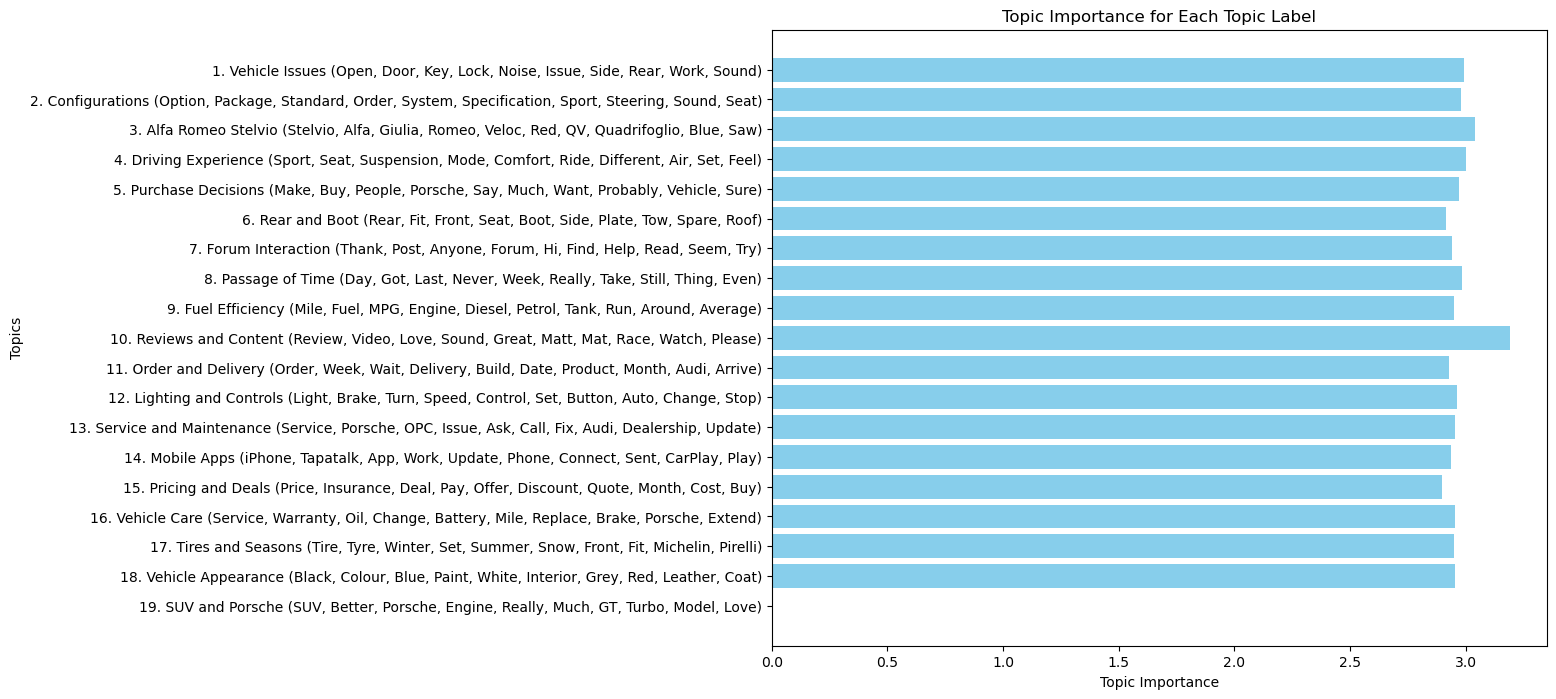

In [64]:
# Define the topic labels and numbers
topics = [
    "1. Vehicle Issues (Open, Door, Key, Lock, Noise, Issue, Side, Rear, Work, Sound)",
    "2. Configurations (Option, Package, Standard, Order, System, Specification, Sport, Steering, Sound, Seat)",
    "3. Alfa Romeo Stelvio (Stelvio, Alfa, Giulia, Romeo, Veloc, Red, QV, Quadrifoglio, Blue, Saw)",
    "4. Driving Experience (Sport, Seat, Suspension, Mode, Comfort, Ride, Different, Air, Set, Feel)",
    "5. Purchase Decisions (Make, Buy, People, Porsche, Say, Much, Want, Probably, Vehicle, Sure)",
    "6. Rear and Boot (Rear, Fit, Front, Seat, Boot, Side, Plate, Tow, Spare, Roof)",
    "7. Forum Interaction (Thank, Post, Anyone, Forum, Hi, Find, Help, Read, Seem, Try)",
    "8. Passage of Time (Day, Got, Last, Never, Week, Really, Take, Still, Thing, Even)",
    "9. Fuel Efficiency (Mile, Fuel, MPG, Engine, Diesel, Petrol, Tank, Run, Around, Average)",
    "10. Reviews and Content (Review, Video, Love, Sound, Great, Matt, Mat, Race, Watch, Please)",
    "11. Order and Delivery (Order, Week, Wait, Delivery, Build, Date, Product, Month, Audi, Arrive)",
    "12. Lighting and Controls (Light, Brake, Turn, Speed, Control, Set, Button, Auto, Change, Stop)",
    "13. Service and Maintenance (Service, Porsche, OPC, Issue, Ask, Call, Fix, Audi, Dealership, Update)",
    "14. Mobile Apps (iPhone, Tapatalk, App, Work, Update, Phone, Connect, Sent, CarPlay, Play)",
    "15. Pricing and Deals (Price, Insurance, Deal, Pay, Offer, Discount, Quote, Month, Cost, Buy)",
    "16. Vehicle Care (Service, Warranty, Oil, Change, Battery, Mile, Replace, Brake, Porsche, Extend)",
    "17. Tires and Seasons (Tire, Tyre, Winter, Set, Summer, Snow, Front, Fit, Michelin, Pirelli)",
    "18. Vehicle Appearance (Black, Colour, Blue, Paint, White, Interior, Grey, Red, Leather, Coat)",
    "19. SUV and Porsche (SUV, Better, Porsche, Engine, Really, Much, GT, Turbo, Model, Love)"
]

# Create a DataFrame for topic_overall
data = {
    "topic_overall": [
        2.992839, 2.982295, 3.040328, 3.003945, 2.973900, 2.917448,
        2.942354, 2.984555, 2.948630, 3.191890, 2.929154, 2.965299,
        2.954295, 2.938986, 2.899674, 2.955471, 2.949232, 2.952531,0
    ]
}
df_topic_overall = pd.DataFrame(data)

# Plot the chart
plt.figure(figsize=(10, 8))
plt.barh(topics, df_topic_overall['topic_overall'], color='skyblue')
plt.xlabel('Topic Importance')
plt.ylabel('Topics')
plt.title('Topic Importance for Each Topic Label')
plt.gca().invert_yaxis()  # Invert y-axis to have the highest importance on top
plt.show()


# 5.2. Compare Before and After Release

In [66]:
##### 假設您有一個名為 'df' 的 DataFrame，其中有一個 'Date' 欄位

# 定義日期轉換函數
def convert_date(desc):
    if 'years ago' in desc:
        years = int(desc.split()[0])
        return (datetime.now() - timedelta(days=years*365)).strftime('%Y-%m-%d')
    elif 'months ago' in desc:
        months = int(desc.split()[0])
        return (datetime.now() - timedelta(days=months*30)).strftime('%Y-%m-%d')
    elif 'days ago' in desc:
        days = int(desc.split()[0])
        return (datetime.now() - timedelta(days=days)).strftime('%Y-%m-%d')
    else:
        try:
            # 嘗試使用格式 "Month Day, Year" 解析日期
            return datetime.strptime(desc, '%B %d, %Y').strftime('%Y-%m-%d')
        except:
            return '2022-01-01'  # 預設日期，根據需要進行調整

# 將日期轉換函數應用於整個 'Date' 欄位
df['Date'] = df['Date'].apply(convert_date)

# 將 'Date' 欄位轉換為日期對象
df['Date'] = pd.to_datetime(df['Date'])

In [67]:
# 設定發布日期為 2022 年 3 月 1 日
release_date = datetime(2022, 3, 1)

# 使用 np.where 添加新的列来区分数据
df['Release_Period'] = np.where(df['Date'] < release_date, 'before_release', 'after_release')
df.to_excel('output_filename.xlsx', index=False, engine='openpyxl')

# 分割數據為發布日期之前和之後的部分
df_before_release = df[df['Date'] < release_date]
df_after_release = df[df['Date'] >= release_date]

In [68]:
df

Unnamed: 0                                            Comment  \
0             1.0  I'm not sure I have ever commented on a video,...   
1             2.0  I’ve always done the cup holder test in all my...   
2             3.0  I absolutely love the design of the Stelvio an...   
3             4.0  I believe the reason behind the column mounted...   
4             5.0  Finally! As a previous 4C Spider and now Giuli...   
...           ...                                                ...   
60678         NaN  I suppose we should be grateful that at least ...   
60679         NaN  Our first macan was a base on 21s with no Pasm...   
60680         NaN  For gen3, on the uk configurator PASM is not c...   
60681         NaN  Well that is another reason for avoiding the 2...   
60682         NaN  We don’t do too bad. At current exchange rates...   

                           Name       Date    Pos    Neg    Neu  \
0      \n @charlesconnor1737\n  2020-08-29  0.207  0.070  0.723   
1             \n @gllegacy87\n  2020-08-29  0.206  0.000  0.794   
2          \n @driftattack11\n  2019-08-30  0.133  0.136  0.731   
3         \n @Black2005Lotus\n  2019-08-30  0.100  0.082  0.818   
4          \n @DrachenBlasen\n  2019-08-30  0.171  0.027  0.802   
...                         ...        ...    ...    ...    ...   
60678            Wing Commander 2021-10-02    NaN    NaN    NaN   
60679                    sd1985 2021-10-02    NaN    NaN    NaN   
60680                      BanZ 2021-10-02    NaN    NaN    NaN   
60681                  Col Lamb 2021-10-02    NaN    NaN    NaN   
60682            mark-yorkshire 2021-10-02    NaN    NaN    NaN   

                    Model   Source  sentiment_score  \
0      Alfa Romeo Stelvio  Youtube                5   
1      Alfa Romeo Stelvio  Youtube                4   
2      Alfa Romeo Stelvio  Youtube                2   
3      Alfa Romeo Stelvio  Youtube                4   
4      Alfa Romeo Stelvio  Youtube                5   
...                   ...      ...              ...   
60678       Porsche Macan   Forums                5   
60679       Porsche Macan   Forums                3   
60680       Porsche Macan   Forums                4   
60681       Porsche Macan   Forums                1   
60682       Porsche Macan   Forums                3   

                                       Processed_Comment  topic_overall  \
0      sure ever comment video want say video convinc...           10.0   
1      alway done cup holder test buy differ concern ...            5.0   
2      absolut love design stelvio giulia giulia list...            5.0   
3      believ reason behind column mount shifter trad...           12.0   
4      final previou spider giulia quadrifoglio owner...            3.0   
...                                                  ...            ...   
60678       suppos grate least porsch still allow us buy            NaN   
60679  first macan base pasm air realli come inferior...            NaN   
60680  uk configur pasm current option base macan sta...            NaN   
60681  well anoth reason avoid shout buy macan wheel ...            NaN   
60682  bad current exchang rate germani seem spec als...            NaN   

       Release_Period  
0      before_release  
1      before_release  
2      before_release  
3      before_release  
4      before_release  
...               ...  
60678  before_release  
60679  before_release  
60680  before_release  
60681  before_release  
60682  before_release  

[59465 rows x 13 columns]

In [173]:
# 假設你的資料框名稱是 df
before_release_count = df[df['Release_Period'] == 'after_release'].shape[0]
print("Number of entries in 'before_release' period:", before_release_count)


Number of entries in 'before_release' period: 24211


# 5.2.1.Before_release

In [565]:
corpus_before_release = convert_review_to_corpus(df_before_release['Processed_Comment'])

In [566]:
mdl_before_release = modeling(corpus_before_release)

Num docs:35254, Num Vocabs:6061, Total Words:576006
Removed Top words:  bmw
Iteration: 0000, LL per word: -11.45
Iteration: 0020, LL per word: -8.527
Iteration: 0040, LL per word: -8.248
Iteration: 0060, LL per word: -8.145
Iteration: 0080, LL per word: -8.089
Iteration: 0100, LL per word: -8.048
Iteration: 0120, LL per word: -8.019
Iteration: 0140, LL per word: -7.999
Iteration: 0160, LL per word: -7.985
Iteration: 0180, LL per word: -7.974
Iteration: 0200, LL per word: -7.963
Iteration: 0220, LL per word: -7.956
Iteration: 0240, LL per word: -7.949
Iteration: 0260, LL per word: -7.941
Iteration: 0280, LL per word: -7.937
Iteration: 0300, LL per word: -7.928
Iteration: 0320, LL per word: -7.926
Iteration: 0340, LL per word: -7.92
Iteration: 0360, LL per word: -7.918
Iteration: 0380, LL per word: -7.911
Iteration: 0400, LL per word: -7.909
Iteration: 0420, LL per word: -7.91
Iteration: 0440, LL per word: -7.904
Iteration: 0460, LL per word: -7.897
Iteration: 0480, LL per word: -7.897
I

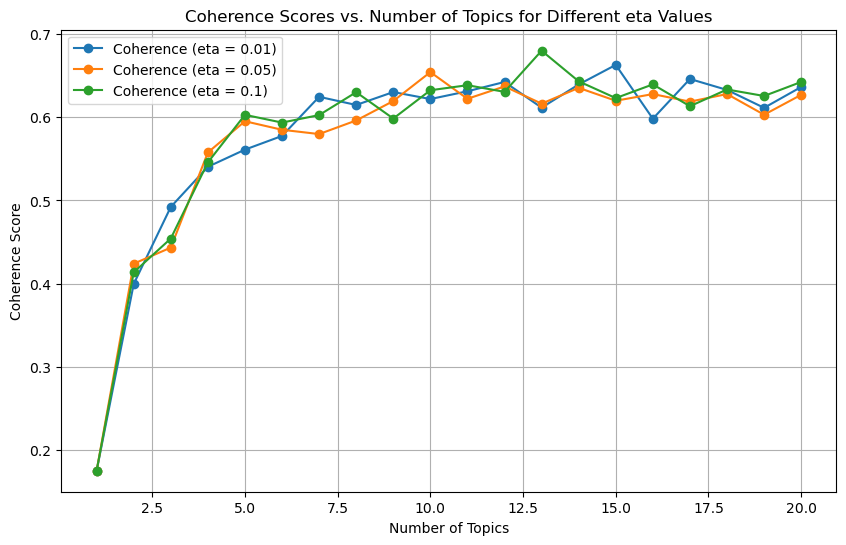

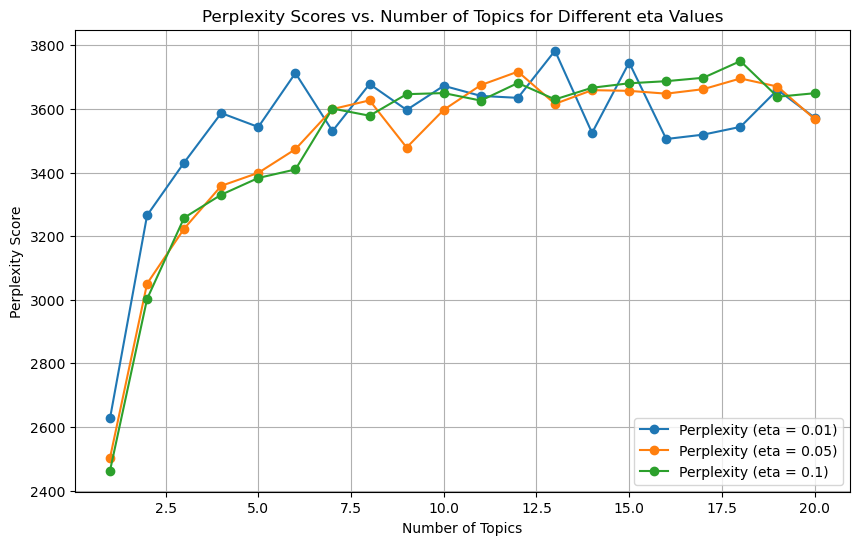

------------------------------------------------
under eta value:  0.1  Optimal number of topics for highest coherence:  13
Optimal number of topics for lowest perplexity: 1


In [568]:
coherence_topic_number_before_release, optimal_model_before_release, all_coherence_before_release = result(corpus_before_release)

In [569]:
# Save the optimal model
optimal_model_before_release.save("mdl_before_release", True)

In [165]:
optimal_model_before_release = tp.LDAModel.load("mdl_before_release")

In [74]:
# Call the function

prepared_data = visualize_lda_model(optimal_model_before_release, 13)

# Display the visualization
pyLDAvis.display(prepared_data)

Preparing Data:  20%|█████▊                       | 1/5 [00:01<00:05,  1.34s/it]


In [70]:
# Loading the best model
best_mdl = tp.LDAModel.load("mdl_before_release")

# Create an empty DataFrame to store topic-word distribution
topic_words_df = pd.DataFrame(columns=["Topic"] + [f"Word_{i}" for i in range(1, 25)])

# Get the topic-word distribution and store the top 24 words for each topic
for topic_id in range(best_mdl.k):
    topic_words = best_mdl.get_topic_words(topic_id, top_n=24)
    words = [word for word, _ in topic_words]
    topic_words_df.loc[len(topic_words_df)] = [topic_id + 1] + words

# Define the keywords_analyze function
def keywords_analyze(optimal_num, topic_words_df):
    console = Console()
    table = Table(
        show_header=True,
        header_style="cyan",
        title="[bold] [cyan] Word to topic (top 10 words)[/cyan]",
        width=120)
    
    table.add_column("Topic", justify="center", style="cyan", width=8)
    for i in range(1, 11):
        table.add_column(f"W {i}", width=12)
        
    for k in range(optimal_num):
        values = topic_words_df.iloc[k, 1:11].tolist()
        table.add_row(str(k + 1), *values)
        
    console.print(table)
    return table

# Call the function for keyword analysis
table = keywords_analyze(best_mdl.k, topic_words_df)


                                               Word to topic (top 10 words)                                        
┏━━━━━━┳━━━━━━━━━━┳━━━━━━━━━━┳━━━━━━━━━━┳━━━━━━━━━━┳━━━━━━━━━━┳━━━━━━━━━━┳━━━━━━━━━━┳━━━━━━━━━━━┳━━━━━━━━━━┳━━━━━━━
┃ Top… ┃ W 1      ┃ W 2      ┃ W 3      ┃ W 4      ┃ W 5      ┃ W 6      ┃ W 7      ┃ W 8       ┃ W 9      ┃ W 10  
┡━━━━━━╇━━━━━━━━━━╇━━━━━━━━━━╇━━━━━━━━━━╇━━━━━━━━━━╇━━━━━━━━━━╇━━━━━━━━━━╇━━━━━━━━━━╇━━━━━━━━━━━╇━━━━━━━━━━╇━━━━━━━
│  1   │ iphon    │ tapatalk │ sent     │ fit      │ spare    │ seat     │ rear     │ app       │ mobil    │ cargo 
│  2   │ work     │ updat    │ phone    │ system   │ connect  │ carplay  │ thank    │ code      │ play     │ tri   
│  3   │ seat     │ sport    │ option   │ packag   │ steer    │ standard │ suspens  │ adapt     │ comfort  │ light 
│  4   │ black    │ blue     │ colour   │ white    │ red      │ stelvio  │ grey     │ color     │ interior │ love  
│  5   │ front    │ side     │ rear     │ door     │ water    │ paint    │ cover    │ fit       │ window   │ remov 
│  6   │ week     │ thank    │ wait     │ audi     │ day      │ deliveri │ mine     │ build     │ product  │ last  
│  7   │ price    │ audi     │ buy      │ servic   │ deal     │ warranti │ got      │ month     │ pay      │ offer 
│  8   │ alfa     │ stelvio  │ review   │ giulia   │ sound    │ video    │ love     │ romeo     │ matt     │ race  
│  9   │ ford     │ puma     │ front    │ stelvio  │ maserati │ macan    │ swift    │ franc     │ suzuki   │ mean  
│  10  │ macan    │ better   │ much     │ realli   │ porsch   │ engin    │ suv      │ make      │ model    │ well  
│  11  │ turn     │ open     │ brake    │ start    │ light    │ batteri  │ issu     │ work      │ button   │ stop  
│  12  │ mile     │ mpg      │ fuel     │ diesel   │ oil      │ engin    │ tank     │ petrol    │ averag   │ chang 
│  13  │ tire     │ tyre     │ winter   │ set      │ front    │ snow     │ fit      │ pirelli   │ summer   │ road  
└──────┴──────────┴──────────┴──────────┴──────────┴──────────┴──────────┴──────────┴───────────┴──────────┴───────

Topic 1: iPhone & Mobile Apps
This topic pertains to "iPhone," "Tapatalk," "sent," "fit," "spare," "seat," "rear," "app," "mobile," and "cargo." It might involve discussions related to mobile app usage, compatibility, and convenience in the automotive context.

Topic 2: Software & Updates
This topic encompasses terms like "work," "update," "phone," "system," "connect," "CarPlay," "thank," "code," "play," and "try." It may relate to software updates, connectivity features, and user experiences with technology updates.

Topic 3: Seat Options & Suspension
This topic includes terms such as "seat," "sport," "option," "package," "steering," "standard," "suspension," "adapt," "comfort," and "light." It could involve discussions about seating choices, suspension preferences, and comfort features.

Topic 4: Color & Interior
This topic involves terms like "black," "blue," "colour," "white," "red," "Stelvio," "grey," "color," "interior," and "love." It might cover discussions about car aesthetics, interior design, and color preferences.

Topic 5: Car Parts & Maintenance
This topic covers terms like "front," "side," "rear," "door," "water," "paint," "cover," "fit," "window," and "remove." It could relate to conversations about car parts, maintenance procedures, and repair experiences.

Topic 6: Waiting & Delivery
This topic includes terms such as "week," "thank," "wait," "Audi," "day," "delivery," "mine," "build," "product," and "last." It might involve discussions about waiting times, delivery experiences, and customer expectations.

Topic 7: Pricing & Deals
This topic encompasses terms like "price," "Audi," "buy," "service," "deal," "warranty," "got," "month," "pay," and "offer." It may cover conversations about pricing strategies, dealership deals, and customer negotiations.

Topic 8: Alfa Romeo & Reviews
This topic involves terms like "Alfa," "Stelvio," "review," "Giulia," "sound," "video," "love," "Romeo," "Matt," and "race." It might include discussions about Alfa Romeo models, reviews, and the overall driving experience.

Topic 9: Ford & Suzuki
This topic includes terms such as "Ford," "Puma," "front," "Stelvio," "Maserati," "Macan," "Swift," "Franc," "Suzuki," and "mean." It could relate to comparisons between Ford, Stelvio, and other car models, as well as discussions about different brands.

Topic 10: Porsche & SUVs
This topic covers terms like "Macan," "better," "much," "really," "Porsche," "engine," "SUV," "make," "model," and "well." It may involve conversations about Porsche SUVs, their performance, and comparisons with other models.

Topic 11: Starting & Stopping
This topic encompasses terms like "turn," "open," "brake," "start," "light," "battery," "issue," "work," "button," and "stop." It might relate to discussions about starting and stopping procedures, vehicle issues, and user experiences.

Topic 12: Mileage & Fuel
This topic involves terms like "mile," "MPG," "fuel," "diesel," "oil," "engine," "tank," "petrol," "average," and "change." It could cover conversations about fuel efficiency, mileage performance, and maintenance practices.

Topic 13: Tires & Seasons
This topic includes terms such as "tire," "tyre," "winter," "set," "front," "snow," "fit," "Pirelli," "summer," and "road." It might relate to discussions about tire choices, seasonal driving challenges, and road conditions.

In [83]:
best_mdl = tp.LDAModel.load("mdl_before_release")                             # step 1
td = pd.DataFrame(                                                # step 2
        np.stack([doc.get_topic_dist() for doc in best_mdl.docs]),
        columns=["topic_{}".format(i + 1) for i in range(best_mdl.k)],
    )

# Find the topic with the maximum probability for each row
td["max_topic"] = td.iloc[:, :-1].idxmax(axis=1)  # Find the column name with max value

# Extract the numeric part from the "topic_" column name
td["topic_before_release"] = td["max_topic"].str.split("_", expand=True)[1].astype(int)


# Add the 'topic_overall' column to the original DataFrame 'df'
df["topic_before_release"] = td["topic_before_release"]

# Print the updated DataFrame
print(df)

       Unnamed: 0                                            Comment  \
0             1.0  I'm not sure I have ever commented on a video,...   
1             2.0  I’ve always done the cup holder test in all my...   
2             3.0  I absolutely love the design of the Stelvio an...   
3             4.0  I believe the reason behind the column mounted...   
4             5.0  Finally! As a previous 4C Spider and now Giuli...   
...           ...                                                ...   
60678         NaN  I suppose we should be grateful that at least ...   
60679         NaN  Our first macan was a base on 21s with no Pasm...   
60680         NaN  For gen3, on the uk configurator PASM is not c...   
60681         NaN  Well that is another reason for avoiding the 2...   
60682         NaN  We don’t do too bad. At current exchange rates...   

                           Name       Date    Pos    Neg    Neu  \
0      \n @charlesconnor1737\n  2020-08-29  0.207  0.070  0.723   
1

In [90]:
td

topic_1   topic_2   topic_3   topic_4   topic_5   topic_6   topic_7  \
0      0.001927  0.002293  0.002524  0.001867  0.003142  0.005247  0.007049   
1      0.108670  0.001637  0.001802  0.001333  0.002243  0.003746  0.219621   
2      0.000802  0.000954  0.001051  0.000777  0.001308  0.002184  0.440795   
3      0.035858  0.036111  0.001740  0.001287  0.002166  0.003617  0.281097   
4      0.001284  0.001528  0.001682  0.001244  0.035471  0.003496  0.104828   
...         ...       ...       ...       ...       ...       ...       ...   
35249  0.004293  0.005109  0.005623  0.004159  0.007000  0.011689  0.238906   
35250  0.003216  0.003827  0.004212  0.003116  0.339679  0.008757  0.095373   
35251  0.001927  0.002293  0.653812  0.001867  0.003142  0.005247  0.057148   
35252  0.001284  0.001528  0.001682  0.001244  0.002093  0.003496  0.138206   
35253  0.003510  0.004177  0.004597  0.003400  0.005722  0.009556  0.377786   

        topic_8   topic_9  topic_10  topic_11  topic_12  topic_13 max_topic  \
0      0.505736  0.000664  0.460424  0.005080  0.002187  0.001859   topic_8   
1      0.217977  0.000474  0.435982  0.003626  0.001561  0.001327  topic_10   
2      0.231331  0.000276  0.316725  0.002114  0.000910  0.000774   topic_7   
3      0.141390  0.000457  0.110160  0.383329  0.001508  0.001281  topic_11   
4      0.470444  0.000442  0.373501  0.003384  0.001457  0.001238   topic_8   
...         ...       ...       ...       ...       ...       ...       ...   
35249  0.122173  0.001478  0.579242  0.011316  0.004872  0.004141  topic_10   
35250  0.007920  0.001107  0.517561  0.008477  0.003650  0.003102  topic_10   
35251  0.004746  0.000664  0.209929  0.055179  0.002187  0.001859   topic_3   
35252  0.003162  0.000442  0.306747  0.036762  0.001457  0.501898  topic_10   
35253  0.008643  0.001208  0.564782  0.009251  0.003983  0.003385  topic_10   

       topic_before_release  
0                         8  
1                        10  
2                         7  
3                        11  
4                         8  
...                     ...  
35249                    10  
35250                    10  
35251                     3  
35252                    10  
35253                    10  

[35254 rows x 15 columns]

In [81]:
topic_counts = td['topic_before_release'].value_counts().sort_index()
print(topic_counts)

total_count = topic_counts.sum()
print("Total count of topics:", total_count)

topic_before_release
0     1176
1     1751
2     1731
3     1467
4     2287
5     3842
6     5424
7     3915
8      593
9     7788
10    3793
11    1487
Name: count, dtype: int64
Total count of topics: 35254


In [91]:
# Calculate the average sentiment score for each label in the 'topic_overall' column
average_sentiment_by_topic = df.groupby('topic_before_release')['sentiment_score'].mean()

# Print the calculated average sentiment scores
print(average_sentiment_by_topic)

topic_before_release
1.0     2.884749
2.0     2.952546
3.0     2.947801
4.0     3.072614
5.0     2.953180
6.0     2.942550
7.0     2.966897
8.0     3.246862
9.0     2.881034
10.0    3.026151
11.0    2.964744
12.0    2.984375
Name: sentiment_score, dtype: float64


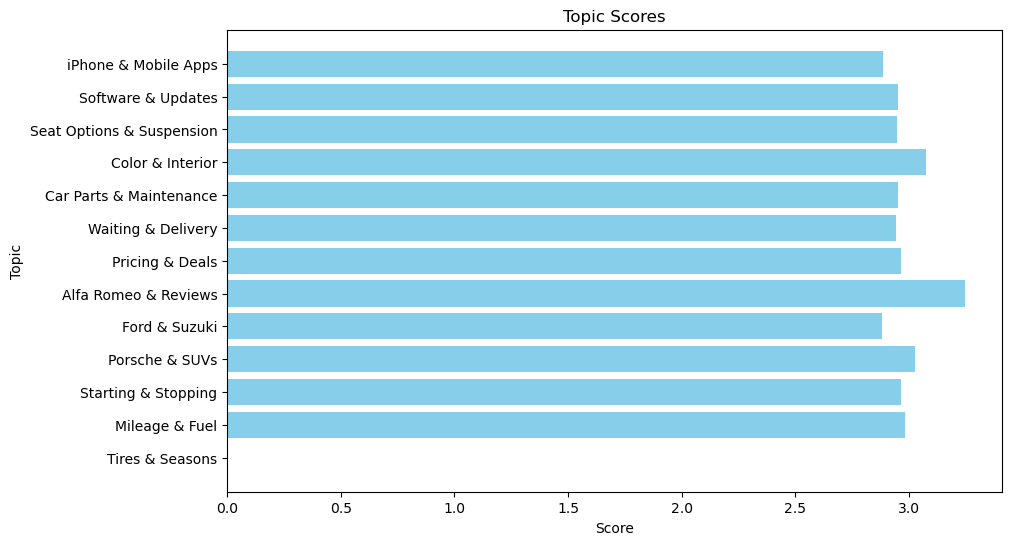

In [135]:
import matplotlib.pyplot as plt
import pandas as pd

# 提供的數據
topics = [
    "iPhone & Mobile Apps", "Software & Updates", "Seat Options & Suspension",
    "Color & Interior", "Car Parts & Maintenance", "Waiting & Delivery",
    "Pricing & Deals", "Alfa Romeo & Reviews", "Ford & Suzuki",
    "Porsche & SUVs", "Starting & Stopping", "Mileage & Fuel", "Tires & Seasons"
]

scores = [
    2.884749, 2.952546, 2.947801,
    3.072614, 2.953180, 2.942550,
    2.966897, 3.246862, 2.881034,
    3.026151, 2.964744, 2.984375,0
]

# 創建數據框
data = pd.DataFrame({"Topic": topics, "Score": scores})

# 繪製圖表
plt.figure(figsize=(10, 6))
plt.barh(data["Topic"], data["Score"], color="skyblue")
plt.xlabel("Score")
plt.ylabel("Topic")
plt.title("Topic Scores")
plt.gca().invert_yaxis()  # 顛倒y軸，讓分數高的在上面
plt.show()


# 5.2.2. After_release

In [570]:
corpus_after_release = convert_review_to_corpus(df_after_release['Processed_Comment'])

In [571]:
mdl__after_release = modeling(corpus_after_release)

Num docs:24211, Num Vocabs:5143, Total Words:402017
Removed Top words:  macan
Iteration: 0000, LL per word: -11.51
Iteration: 0020, LL per word: -8.483
Iteration: 0040, LL per word: -8.223
Iteration: 0060, LL per word: -8.112
Iteration: 0080, LL per word: -8.051
Iteration: 0100, LL per word: -8.013
Iteration: 0120, LL per word: -7.986
Iteration: 0140, LL per word: -7.969
Iteration: 0160, LL per word: -7.955
Iteration: 0180, LL per word: -7.944
Iteration: 0200, LL per word: -7.935
Iteration: 0220, LL per word: -7.927
Iteration: 0240, LL per word: -7.919
Iteration: 0260, LL per word: -7.916
Iteration: 0280, LL per word: -7.912
Iteration: 0300, LL per word: -7.906
Iteration: 0320, LL per word: -7.904
Iteration: 0340, LL per word: -7.902
Iteration: 0360, LL per word: -7.898
Iteration: 0380, LL per word: -7.894
Iteration: 0400, LL per word: -7.891
Iteration: 0420, LL per word: -7.889
Iteration: 0440, LL per word: -7.89
Iteration: 0460, LL per word: -7.89
Iteration: 0480, LL per word: -7.89


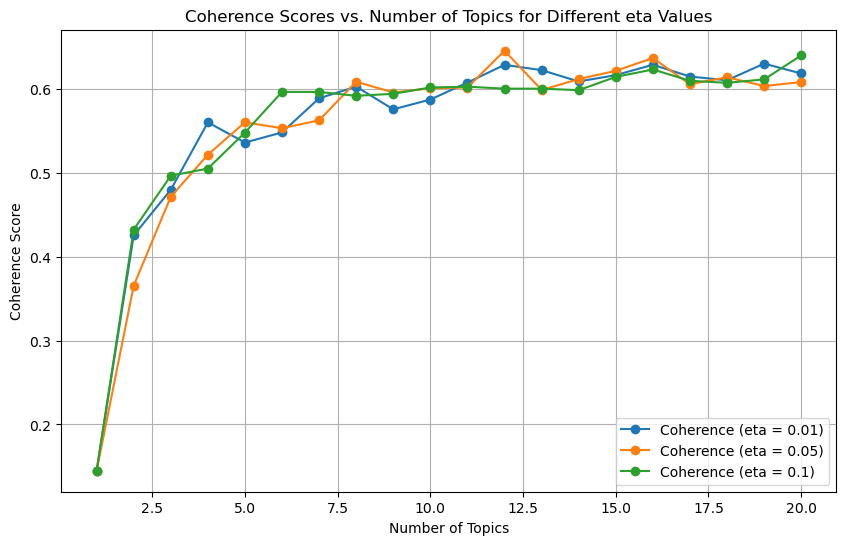

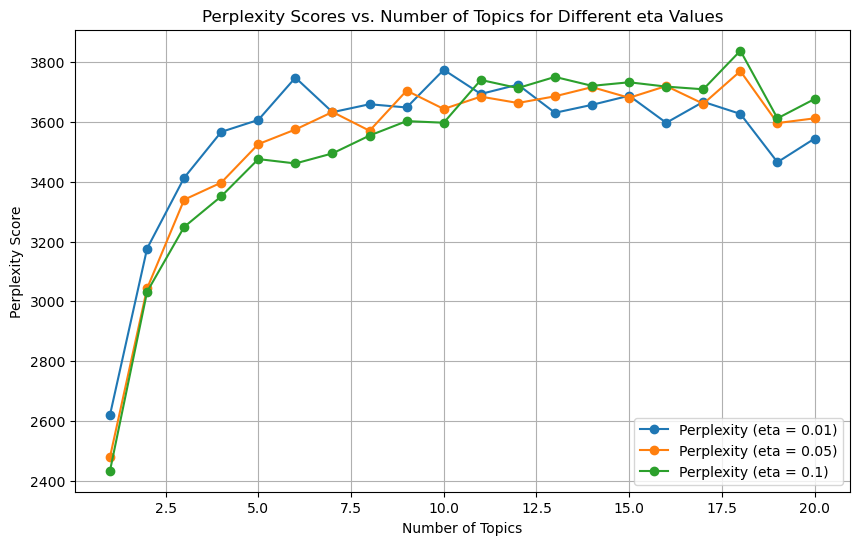

------------------------------------------------
under eta value:  0.05  Optimal number of topics for highest coherence:  12
Optimal number of topics for lowest perplexity: 1


In [572]:
coherence_topic_number_after_release, optimal_model_after_release, all_coherence_after_release = result(corpus_after_release)

In [573]:
# Save the optimal model
optimal_model_after_release.save("mdl_after_release", True)

In [96]:
optimal_model_after_release = tp.LDAModel.load("mdl_after_release")

In [97]:
# Call the function
prepared_data = visualize_lda_model(optimal_model_after_release, 12)

# Display the visualization
pyLDAvis.display(prepared_data)

Preparing Data:  20%|█████▊                       | 1/5 [00:01<00:05,  1.31s/it]


In [99]:
# Loading the best model
best_mdl = tp.LDAModel.load("mdl_after_release")

# Create an empty DataFrame to store topic-word distribution
topic_words_df = pd.DataFrame(columns=["Topic"] + [f"Word_{i}" for i in range(1, 25)])

# Get the topic-word distribution and store the top 24 words for each topic
for topic_id in range(best_mdl.k):
    topic_words = best_mdl.get_topic_words(topic_id, top_n=24)
    words = [word for word, _ in topic_words]
    topic_words_df.loc[len(topic_words_df)] = [topic_id + 1] + words

# Define the keywords_analyze function
def keywords_analyze(optimal_num, topic_words_df):
    console = Console()
    table = Table(
        show_header=True,
        header_style="cyan",
        title="[bold] [cyan] Word to topic (top 10 words)[/cyan]",
        width=120)
    
    table.add_column("Topic", justify="center", style="cyan", width=8)
    for i in range(1, 11):
        table.add_column(f"W {i}", width=12)
        
    for k in range(optimal_num):
        values = topic_words_df.iloc[k, 1:11].tolist()
        table.add_row(str(k + 1), *values)
        
    console.print(table)
    return table

# Call the function for keyword analysis
table = keywords_analyze(best_mdl.k, topic_words_df)


                                               Word to topic (top 10 words)                                        
┏━━━━━━┳━━━━━━━━━━┳━━━━━━━━━━┳━━━━━━━━━━┳━━━━━━━━━━┳━━━━━━━━━━┳━━━━━━━━━━┳━━━━━━━━━━┳━━━━━━━━━━━┳━━━━━━━━━━┳━━━━━━━
┃ Top… ┃ W 1      ┃ W 2      ┃ W 3      ┃ W 4      ┃ W 5      ┃ W 6      ┃ W 7      ┃ W 8       ┃ W 9      ┃ W 10  
┡━━━━━━╇━━━━━━━━━━╇━━━━━━━━━━╇━━━━━━━━━━╇━━━━━━━━━━╇━━━━━━━━━━╇━━━━━━━━━━╇━━━━━━━━━━╇━━━━━━━━━━━╇━━━━━━━━━━╇━━━━━━━
│  1   │ colour   │ black    │ wheel    │ red      │ love     │ interior │ great    │ leather   │ grey     │ spec  
│  2   │ sport    │ gt       │ gen      │ suspens  │ mode     │ differ   │ air      │ set       │ ride     │ engin 
│  3   │ price    │ warranti │ cost     │ opc      │ insur    │ pay      │ quot     │ buy       │ offer    │ dealer
│  4   │ ev       │ rori     │ batteri  │ charg    │ review   │ ice      │ electr   │ watch     │ video    │ uk    
│  5   │ rear     │ front    │ side     │ fit      │ roof     │ door     │ wash     │ remov     │ coat     │ clean 
│  6   │ issu     │ connect  │ light    │ system   │ batteri  │ updat    │ set      │ key       │ turn     │ button
│  7   │ mile     │ oil      │ chang    │ engin    │ brake    │ fuel     │ done     │ run       │ replac   │ warran
│  8   │ realli   │ make     │ better   │ much     │ buy      │ suv      │ want     │ bmw       │ never    │ thing 
│  9   │ tyre     │ wheel    │ tire     │ winter   │ set      │ summer   │ size     │ michelin  │ bmw      │ fit   
│  10  │ seat     │ option   │ way      │ standard │ spec     │ system   │ bose     │ steer     │ wheel    │ comfor
│  11  │ order    │ week     │ dealer   │ thank    │ opc      │ wait     │ post     │ month     │ ask      │ day   
│  12  │ road     │ park     │ day      │ around   │ mile     │ trip     │ speed    │ limit     │ last     │ got   
└──────┴──────────┴──────────┴──────────┴──────────┴──────────┴──────────┴──────────┴───────────┴──────────┴───────

Topic 1: Color & Interior
This topic focuses on discussions about vehicle color choices, including terms such as "colour," "black," "wheel," and "red." Interior features like "interior," "leather," and "grey" are also mentioned, potentially indicating conversations about customization preferences, aesthetics, and material choices.

Topic 2: Sporty Performance
Encompassing terms like "sport," "gt," "suspension," and "engine," this topic appears to revolve around discussions about high-performance aspects of vehicles. "Mode," "air," and "ride" may relate to driving modes and ride quality. Further analysis could delve into consumers' preferences for sporty driving experiences and the significance of suspension systems.

Topic 3: Pricing & Offers
Terms such as "price," "warranty," "cost," and "dealer" indicate discussions centered around the financial aspects of vehicle ownership. "Insur," "pay," "quot," and "offer" might involve conversations about insurance costs, payment methods, and dealership deals. Analyzing this topic could reveal consumer perspectives on affordability and pricing strategies.

Topic 4: Electric Vehicles & Reviews
This topic includes terms like "ev," "battery," "review," and "video," indicating discussions about electric vehicles, battery technology, and reviews. "Electr" and "watch" may suggest interest in electric car technology and video content. Further analysis could reveal consumer sentiment towards EVs and the role of reviews in influencing purchase decisions.

Topic 5: Exterior Care & Maintenance
This topic encompasses terms such as "rear," "front," "roof," "door," and "clean," pointing towards discussions about vehicle exterior care and maintenance. "Wash," "remove," and "coat" might involve conversations about cleaning routines and protective coatings. Further analysis could reveal consumer practices and preferences related to vehicle upkeep.

Topic 6: Vehicle Issues & Updates
Terms like "issue," "connect," "light," and "system" suggest discussions about vehicle performance, connectivity, and software updates. "Battery," "update," "set," and "button" may relate to software or system updates. Analyzing this topic could provide insights into consumer experiences with vehicle issues and technology updates.

Topic 7: Mileage & Maintenance
This topic involves terms such as "mile," "oil," "change," "engine," and "brake," indicating discussions about vehicle maintenance practices. "Fuel," "run," "replace," and "warranty" might involve conversations about fuel efficiency, routine maintenance, and warranty coverage. Analyzing this topic could provide insights into consumer maintenance behaviors and concerns.

Topic 8: Vehicle Preferences & Comparisons
Terms like "make," "better," "much," and "buy" suggest discussions about consumer preferences and comparisons between vehicle options. "SUV," "want," and "thing" may involve conversations about vehicle preferences and desires. Analyzing this topic could uncover consumer opinions on different vehicle attributes and brand loyalty.

Topic 9: Tire Selection & Preferences
Encompassing terms like "tyre," "wheel," "tire," and "summer," this topic appears to involve discussions about tire choices for different seasons. "Michelin," "fit," and "size" might relate to tire brands and size preferences. Further analysis could provide insights into consumer preferences for tire performance and brand choices.

Topic 10: Seat Comfort & Options
This topic includes terms such as "seat," "option," "standard," and "comfort," suggesting discussions about vehicle seating options and comfort features. "Spec," "system," and "steer" might involve conversations about seating specifications and features. Analyzing this topic could reveal consumer preferences for seating comfort and options.

Topic 11: Ordering & Dealer Interaction
Encompassing terms like "order," "week," "dealer," and "thank," this topic appears to focus on discussions about the ordering process and interactions with dealerships. "Opc," "wait," "post," and "month" may involve conversations about waiting times and customer experiences. Analyzing this topic could provide insights into consumer satisfaction with the ordering process.

Topic 12: Road Experience & Speed
This topic involves terms such as "road," "park," "day," "mile," and "speed," indicating discussions about driving experiences and road conditions. "Limit," "last," and "got" might relate to speed limits and driving practices. Analyzing this topic could reveal consumer perceptions of road conditions and driving behaviors.

In [101]:
best_mdl = tp.LDAModel.load("mdl_after_release")                             # step 1
td = pd.DataFrame(                                                # step 2
        np.stack([doc.get_topic_dist() for doc in best_mdl.docs]),
        columns=["topic_{}".format(i + 1) for i in range(best_mdl.k)],
    )

# Find the topic with the maximum probability for each row
td["max_topic"] = td.iloc[:, :-1].idxmax(axis=1)  # Find the column name with max value

# Extract the numeric part from the "topic_" column name
td["topic_after_release"] = td["max_topic"].str.split("_", expand=True)[1].astype(int)


# Add the 'topic_overall' column to the original DataFrame 'df'
df["topic_after_release"] = td["topic_after_release"]

# Print the updated DataFrame
print(df)



       Unnamed: 0                                            Comment  \
0             1.0  I'm not sure I have ever commented on a video,...   
1             2.0  I’ve always done the cup holder test in all my...   
2             3.0  I absolutely love the design of the Stelvio an...   
3             4.0  I believe the reason behind the column mounted...   
4             5.0  Finally! As a previous 4C Spider and now Giuli...   
...           ...                                                ...   
60678         NaN  I suppose we should be grateful that at least ...   
60679         NaN  Our first macan was a base on 21s with no Pasm...   
60680         NaN  For gen3, on the uk configurator PASM is not c...   
60681         NaN  Well that is another reason for avoiding the 2...   
60682         NaN  We don’t do too bad. At current exchange rates...   

                           Name       Date    Pos    Neg    Neu  \
0      \n @charlesconnor1737\n  2020-08-29  0.207  0.070  0.723   
1

In [103]:

# Calculate the average sentiment score for each label in the 'topic_overall' column
average_sentiment_by_topic = df.groupby('topic_after_release')['sentiment_score'].mean()

# Print the calculated average sentiment scores
print(average_sentiment_by_topic)

topic_after_release
1.0     2.961728
2.0     2.989434
3.0     2.970503
4.0     3.147453
5.0     3.001008
6.0     3.083712
7.0     3.001943
8.0     3.086995
9.0     3.021472
10.0    3.047786
11.0    2.986056
Name: sentiment_score, dtype: float64


<!-- 1.Driving Controls and Modes: Keywords: light, speed, brake, turn, control. This topic seems to be about driving controls, modes, and speed.
2.Electric Vehicles and Charging: Keywords: battery, EV, charge, vehicle, electric. This topic could cover discussions related to electric vehicles and charging.
3.Mobile Apps and Connectivity: Keywords: connect, phone, work, app, update. This topic may involve discussions about mobile apps and vehicle connectivity.
4.Suspension and Comfort Modes: Keywords: sport, seat, suspension, comfort, mode. This topic appears to discuss suspension settings and comfort modes.
5.Porsche and Performance: Keywords: Macan, Porsche, much, make, GT. This topic seems to involve discussions about Porsche vehicles and their performance.
6.Vehicle Maintenance and Repairs: Keywords: issue, fix, engine, start, problem. This topic may cover maintenance and repairs, including engine-related discussions.
7.Car Care and Detailing: Keywords: coat, clean, wash, paint, ceramic. This topic could be about car care and detailing.
8.Pricing and Insurance: Keywords: price, insurance, Porsche, cost, quote. This topic may revolve around discussions about pricing and insurance, particularly for Porsche vehicles.
9.Ordering and Delivery: Keywords: order, week, dealer, wait, build. This topic could be related to ordering vehicles and waiting for their delivery.
10.Vehicle Colors and Specs: Keywords: color, black, leather, wheel, interior. This topic might involve discussions about vehicle colors and specifications.
11.Services and Warranties: Keywords: service, warranty, oil, change, Porsche. This topic seems to discuss vehicle services and warranties, especially for Porsche vehicles.
12.Driving Experiences and Mileage: Keywords: mile, around, trip, road, day. This topic appears to be about driving experiences and mileage.
13.Alfa Romeo and Reviews: Keywords: Stelvio, Alfa, review, Rori, love. This topic may involve discussions about Alfa Romeo vehicles and reviews.
14.Vehicle Parts and Features: Keywords: rear, door, front, open, side. This topic seems to be about different parts and features of vehicles.
15.Interactions and Information Sharing: Keywords: thank, know, see, post, anyone. This topic could cover interactions, sharing information, and expressing gratitude.
16.Comparisons and Preferences: Keywords: said, SUV, BMW, Mercedes, design. This topic might involve comparisons between different vehicles and design preferences.
17.Tires and Seasons: Keywords: tire, wheel, winter, set, summer. This topic seems to discuss tires, including seasonal changes.
 -->

## 5.2.3 camparison result

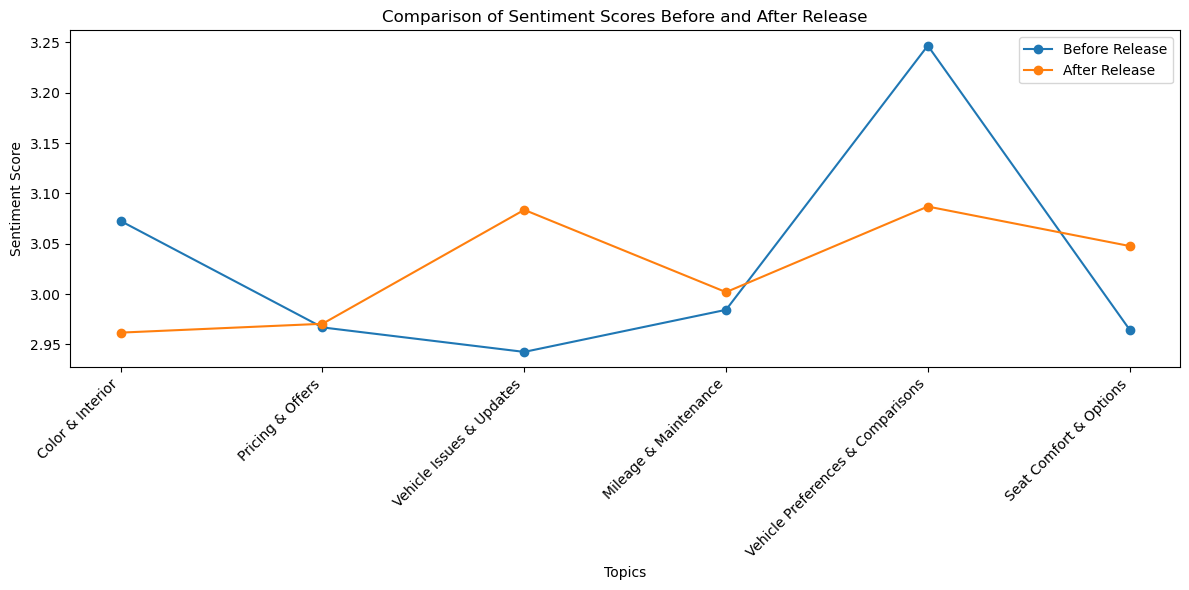

In [153]:
import matplotlib.pyplot as plt

before_release_data = {
    "Color & Interior": 3.072614,
    "Pricing & Offers": 2.966897,
    "Vehicle Issues & Updates": 2.942550,
    "Mileage & Maintenance": 2.984375,
    "Vehicle Preferences & Comparisons": 3.246862,
    "Seat Comfort & Options": 2.964744
}

after_release_data = {
    "Color & Interior": 2.961728,
    "Pricing & Offers": 2.970503,
    "Vehicle Issues & Updates": 3.083712,
    "Mileage & Maintenance": 3.001943,
    "Vehicle Preferences & Comparisons": 3.086995,
    "Seat Comfort & Options": 3.047786
}

# Extract topic names and sentiment scores
topics = list(before_release_data.keys())
scores_before_release = list(before_release_data.values())
scores_after_release = list(after_release_data.values())

# Plot the line chart
plt.figure(figsize=(12, 6))
plt.plot(topics, scores_before_release, marker='o', label='Before Release')
plt.plot(topics, scores_after_release, marker='o', label='After Release')
plt.xticks(rotation=45, ha='right')
plt.xlabel('Topics')
plt.ylabel('Sentiment Score')
plt.title('Comparison of Sentiment Scores Before and After Release')
plt.legend()
plt.tight_layout()
plt.show()


# 5.3. Competition Analysis

## 5.3.1 Grecale 

In [27]:
grecale_comments = df[df['Model'] == 'Maserati Grecale']['Processed_Comment']

In [28]:
corpus_grecale = convert_review_to_corpus(grecale_comments)

In [29]:
mdl_grecale = modeling(corpus_grecale)

Num docs:1668, Num Vocabs:1183, Total Words:25372
Removed Top words:  maserati
Iteration: 0000, LL per word: -11.63
Iteration: 0020, LL per word: -7.264
Iteration: 0040, LL per word: -7.13
Iteration: 0060, LL per word: -7.076
Iteration: 0080, LL per word: -7.049
Iteration: 0100, LL per word: -7.02
Iteration: 0120, LL per word: -7.011
Iteration: 0140, LL per word: -7.003
Iteration: 0160, LL per word: -6.989
Iteration: 0180, LL per word: -6.968
Iteration: 0200, LL per word: -6.953
Iteration: 0220, LL per word: -6.948
Iteration: 0240, LL per word: -6.942
Iteration: 0260, LL per word: -6.938
Iteration: 0280, LL per word: -6.925
Iteration: 0300, LL per word: -6.942
Iteration: 0320, LL per word: -6.933
Iteration: 0340, LL per word: -6.925
Iteration: 0360, LL per word: -6.916
Iteration: 0380, LL per word: -6.913
Iteration: 0400, LL per word: -6.901
Iteration: 0420, LL per word: -6.909
Iteration: 0440, LL per word: -6.905
Iteration: 0460, LL per word: -6.907
Iteration: 0480, LL per word: -6.89

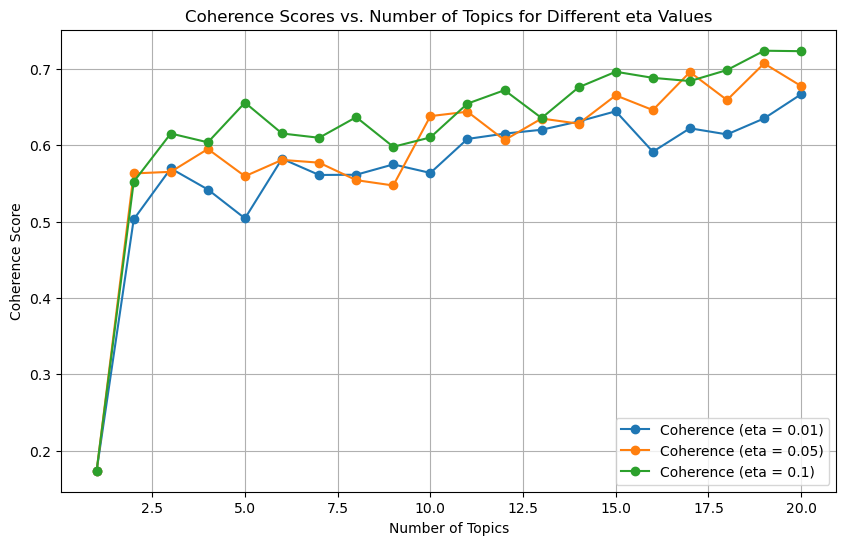

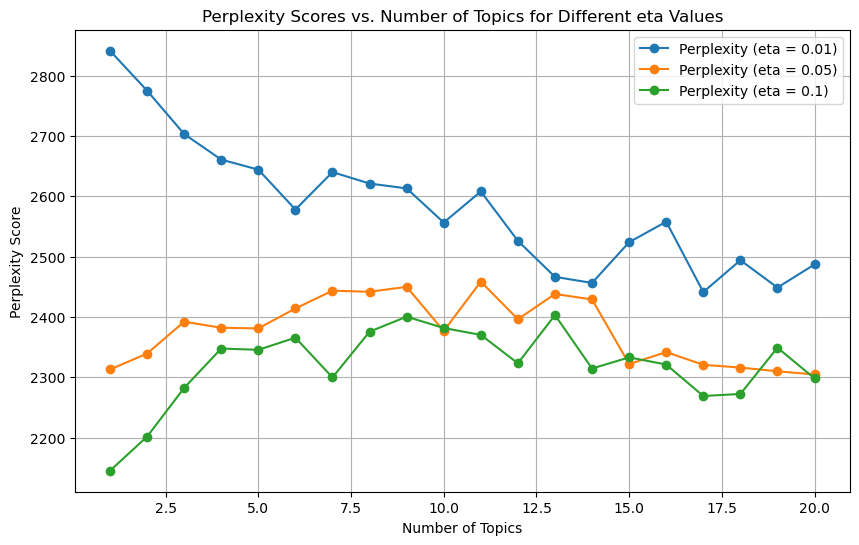

------------------------------------------------
under eta value:  0.1  Optimal number of topics for highest coherence:  19
Optimal number of topics for lowest perplexity: 1


In [30]:
coherence_grecale, optimal_model_grecale, all_coherence_grecale = result(corpus_grecale)

In [31]:
# Save the optimal model
optimal_model_grecale.save("mdl_grecale", True)

In [105]:
optimal_model_grecale = tp.LDAModel.load("mdl_grecale")

In [106]:
# Call the function
prepared_data = visualize_lda_model(optimal_model_grecale, 19)

# Display the visualization
pyLDAvis.display(prepared_data)

Preparing Data:  20%|█████▊                       | 1/5 [00:00<00:03,  1.12it/s]


In [108]:
# Loading the best model
best_mdl = tp.LDAModel.load("mdl_grecale")

# Create an empty DataFrame to store topic-word distribution
topic_words_df = pd.DataFrame(columns=["Topic"] + [f"Word_{i}" for i in range(1, 25)])

# Get the topic-word distribution and store the top 24 words for each topic
for topic_id in range(best_mdl.k):
    topic_words = best_mdl.get_topic_words(topic_id, top_n=24)
    words = [word for word, _ in topic_words]
    topic_words_df.loc[len(topic_words_df)] = [topic_id + 1] + words

# Define the keywords_analyze function
def keywords_analyze(optimal_num, topic_words_df):
    console = Console()
    table = Table(
        show_header=True,
        header_style="cyan",
        title="[bold] [cyan] Word to topic (top 10 words)[/cyan]",
        width=120)
    
    table.add_column("Topic", justify="center", style="cyan", width=8)
    for i in range(1, 11):
        table.add_column(f"W {i}", width=12)
        
    for k in range(optimal_num):
        values = topic_words_df.iloc[k, 1:11].tolist()
        table.add_row(str(k + 1), *values)
        
    console.print(table)
    return table

# Call the function for keyword analysis
table = keywords_analyze(best_mdl.k, topic_words_df)

                                               Word to topic (top 10 words)                                        
┏━━━━━━┳━━━━━━━━━━┳━━━━━━━━━━┳━━━━━━━━━━┳━━━━━━━━━━┳━━━━━━━━━━┳━━━━━━━━━━┳━━━━━━━━━━┳━━━━━━━━━━━┳━━━━━━━━━━┳━━━━━━━
┃ Top… ┃ W 1      ┃ W 2      ┃ W 3      ┃ W 4      ┃ W 5      ┃ W 6      ┃ W 7      ┃ W 8       ┃ W 9      ┃ W 10  
┡━━━━━━╇━━━━━━━━━━╇━━━━━━━━━━╇━━━━━━━━━━╇━━━━━━━━━━╇━━━━━━━━━━╇━━━━━━━━━━╇━━━━━━━━━━╇━━━━━━━━━━━╇━━━━━━━━━━╇━━━━━━━
│  1   │ suspens  │ mode     │ level    │ assist   │ modena   │ set      │ normal   │ sport     │ aero     │ air   
│  2   │ macan    │ price    │ better   │ realli   │ porsch   │ bit      │ make     │ nice      │ much     │ buy   
│  3   │ care     │ direct   │ assist   │ us       │ send     │ contact  │ custom   │ messag    │ thank    │ respon
│  4   │ ford     │ puma     │ design   │ front    │ headlig… │ yellow   │ least    │ aw        │ vent     │ may   
│  5   │ low      │ mile     │ trip     │ seat     │ modena   │ thing    │ small    │ mpg       │ close    │ day   
│  6   │ review   │ love     │ joe      │ great    │ video    │ italian  │ beauti   │ alfa      │ kia      │ alway 
│  7   │ door     │ lock     │ open     │ sound    │ lower    │ unlock   │ beep     │ key       │ park     │ button
│  8   │ stelvio  │ alfa     │ engin    │ romeo    │ platform │ nettuno  │ similar  │ ferrari   │ trofeo   │ giulia
│  9   │ model    │ come     │ una      │ non      │ il       │ wait     │ seem     │ un        │ spare    │ regard
│  10  │ cost     │ price    │ point    │ everi    │ full     │ product  │ discount │ futur     │ much     │ servic
│  11  │ post     │ deliveri │ wait     │ month    │ info     │ uk       │ week     │ start     │ updat    │ date  
│  12  │ estat    │ larg     │ market   │ hatchba… │ rather   │ compani  │ could    │ bare      │ might    │ make  
│  13  │ part     │ interior │ black    │ grigio   │ say      │ product  │ red      │ well      │ na       │ obviou
│  14  │ saloon   │ size     │ seat     │ automot  │ toni     │ hate     │ custom   │ import    │ segment  │ life  
│  15  │ day      │ set      │ softwar  │ vehicl   │ batteri  │ back     │ start    │ even      │ updat    │ thank 
│  16  │ old      │ may      │ width    │ compar   │ edit     │ lordtur… │ feet     │ inch      │ know     │ park  
│  17  │ charg    │ phone    │ kid      │ wife     │ want     │ put      │ peopl    │ move      │ iphon    │ end   
│  18  │ button   │ display  │ screen   │ mode     │ hand     │ fob      │ brake    │ say       │ comfort  │ annoy 
│  19  │ xj       │ speed    │ zf       │ box      │ move     │ jaguar   │ macan    │ type      │ porsch   │ knob  
└──────┴──────────┴──────────┴──────────┴──────────┴──────────┴──────────┴──────────┴───────────┴──────────┴───────

In [152]:
best_mdl = tp.LDAModel.load("mdl_grecale")                             # step 1
td = pd.DataFrame(                                                # step 2
        np.stack([doc.get_topic_dist() for doc in best_mdl.docs]),
        columns=["topic_{}".format(i + 1) for i in range(best_mdl.k)],
    )

# Find the topic with the maximum probability for each row
td["max_topic"] = td.iloc[:, :-1].idxmax(axis=1)  # Find the column name with max value

# Extract the numeric part from the "topic_" column name
td["topic_grecale"] = td["max_topic"].str.split("_", expand=True)[1].astype(int)


# Add the 'topic_overall' column to the original DataFrame 'df'
df["topic_grecale"] = td["topic_grecale"]

# Print the updated DataFrame
print(df)
# Save the DataFrame to a CSV file
df.to_csv("TM_with_topic.csv", index=False)


       Unnamed: 0                                            Comment  \
0             1.0  I'm not sure I have ever commented on a video,...   
1             2.0  I’ve always done the cup holder test in all my...   
2             3.0  I absolutely love the design of the Stelvio an...   
3             4.0  I believe the reason behind the column mounted...   
4             5.0  Finally! As a previous 4C Spider and now Giuli...   
...           ...                                                ...   
60678         NaN  I suppose we should be grateful that at least ...   
60679         NaN  Our first macan was a base on 21s with no Pasm...   
60680         NaN  For gen3, on the uk configurator PASM is not c...   
60681         NaN  Well that is another reason for avoiding the 2...   
60682         NaN  We don’t do too bad. At current exchange rates...   

                           Name       Date    Pos    Neg    Neu  \
0      \n @charlesconnor1737\n  2020-08-29  0.207  0.070  0.723   
1

In [111]:
# Calculate the average sentiment score for each label in the 'topic_overall' column
average_sentiment_by_topic = df.groupby('topic_grecale')['sentiment_score'].mean()

# Print the calculated average sentiment scores
print(average_sentiment_by_topic)

topic_grecale
1.0     3.629630
2.0     3.400438
3.0     3.466667
4.0     3.226804
5.0     3.385714
6.0     3.832000
7.0     3.645570
8.0     3.513158
9.0     3.500000
10.0    3.531250
11.0    4.068323
12.0    3.076923
13.0    2.855072
14.0    3.250000
15.0    3.651163
16.0    3.280000
17.0    3.562500
18.0    2.861111
Name: sentiment_score, dtype: float64


1. Suspension & Driving Modes: Keywords like "suspension," "mode," "level," "assist," and "air" indicate discussions about different driving modes, suspension setups, and adaptive features that affect the vehicle's handling and ride quality.
2. Porsche Macan & Pricing: Keywords "macan," "price," "porsche," "better," and "buy" suggest discussions about the Porsche Macan model, its pricing, and comparisons to other vehicles in terms of value.
3. Customer Care & Assistance: Keywords like "care," "direct," "assist," "contact," and "response" suggest discussions about customer support, direct assistance, and communication with the brand.
4. Ford Puma Design & Features: Keywords "ford," "puma," "design," "headlights," and "vent" indicate discussions related to the design, features, and attributes of the Ford Puma model.
5. Fuel Efficiency & Mileage: Keywords "low," "mile," "trip," "mpg," and "day" suggest discussions about fuel efficiency, mileage, and driving distances.
6. Reviews & Positive Sentiment: Keywords "review," "love," "great," "video," and "beauty" indicate positive sentiments in reviews, videos, and discussions about various vehicles.
7. Door Locks & Security: Keywords "door," "lock," "open," "sound," and "button" suggest discussions related to vehicle security, door locking systems, and sounds associated with them.
8. Alfa Romeo Stelvio & Engine: Keywords "stelvio," "alfa," "engine," "giulia," and "ferrari" indicate discussions about the Alfa Romeo Stelvio model, its engine, and its relation to other Alfa Romeo vehicles.
9. Model Waiting & Expectations: Keywords "model," "come," "wait," "seem," and "regard" suggest discussions about upcoming vehicle models, waiting periods, and expectations.
10. Cost & Pricing Points: Keywords "cost," "price," "point," "product," and "service" indicate discussions about costs, pricing strategies, and various service offerings.
11. Delivery Wait Times & Updates: Keywords "post," "delivery," "wait," "week," and "update" suggest discussions about waiting times for vehicle delivery and updates provided during the process.
12. Estate & Hatchback Comparison: Keywords "estate," "large," "hatchback," "company," and "segment" indicate discussions comparing estate and hatchback vehicles in the automotive market.
13. Interior Part Selection & Colors: Keywords "part," "interior," "black," "red," and "product" suggest discussions about interior parts, colors, and preferences.
14. Saloon Car Size & Comfort: Keywords "saloon," "size," "seat," "segment," and "comfort" suggest discussions about saloon car sizes, seating, and comfort aspects.
15. Vehicle Software & Updates: Keywords "day," "set," "software," "vehicle," and "update" indicate discussions about vehicle software, updates, and their effects.
16. Vehicle Comparisons & Knowledge: Keywords "old," "may," "width," "comparison," and "know" suggest discussions about vehicle comparisons and knowledge sharing.
17. Charging & Connectivity: Keywords "charge," "phone," "move," "iphone," and "end" indicate discussions about charging, phone connectivity, and usability.
18. Display & Control Buttons: Keywords "button," "display," "screen," "mode," and "comfort" suggest discussions about vehicle displays, control buttons, and user interface.
19. Jaguar XJ & Transmission: Keywords "xj," "speed," "zf," "box," and "porsche" suggest discussions about the Jaguar XJ model, its speed, transmission, and comparisons to Porsche vehicles.

## 5.3.2 Alfa romeo

In [32]:
Alfa_Romeo_Stelvio_comments = df[df['Model'] == 'Alfa Romeo Stelvio']['Processed_Comment']

In [33]:
corpus_Alfa_Romeo_Stelvio = convert_review_to_corpus(Alfa_Romeo_Stelvio_comments)

In [34]:
mdl_Alfa_Romeo_Stelvio = modeling(corpus_Alfa_Romeo_Stelvio)

Num docs:10566, Num Vocabs:3437, Total Words:161546
Removed Top words:  stelvio
Iteration: 0000, LL per word: -11.67
Iteration: 0020, LL per word: -8.302
Iteration: 0040, LL per word: -8.049
Iteration: 0060, LL per word: -7.951
Iteration: 0080, LL per word: -7.885
Iteration: 0100, LL per word: -7.848
Iteration: 0120, LL per word: -7.824
Iteration: 0140, LL per word: -7.797
Iteration: 0160, LL per word: -7.788
Iteration: 0180, LL per word: -7.775
Iteration: 0200, LL per word: -7.758
Iteration: 0220, LL per word: -7.756
Iteration: 0240, LL per word: -7.749
Iteration: 0260, LL per word: -7.738
Iteration: 0280, LL per word: -7.731
Iteration: 0300, LL per word: -7.731
Iteration: 0320, LL per word: -7.721
Iteration: 0340, LL per word: -7.721
Iteration: 0360, LL per word: -7.711
Iteration: 0380, LL per word: -7.718
Iteration: 0400, LL per word: -7.714
Iteration: 0420, LL per word: -7.712
Iteration: 0440, LL per word: -7.705
Iteration: 0460, LL per word: -7.696
Iteration: 0480, LL per word: -7

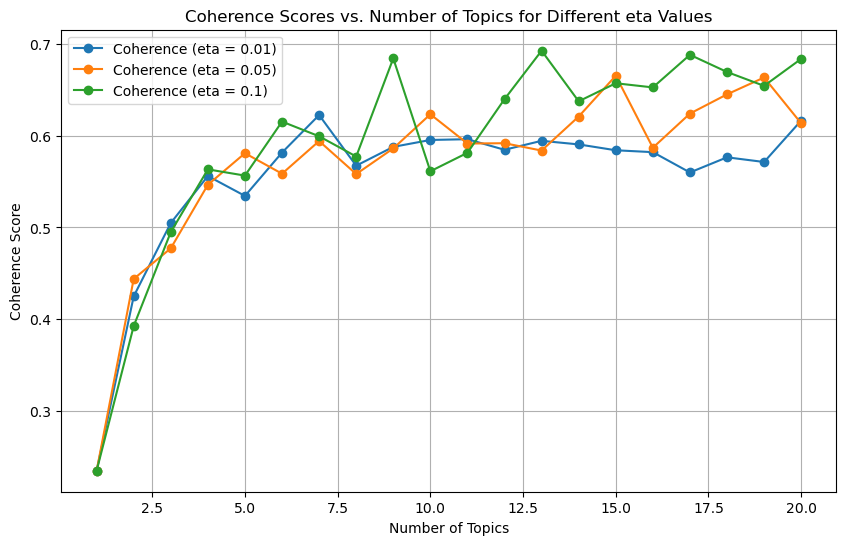

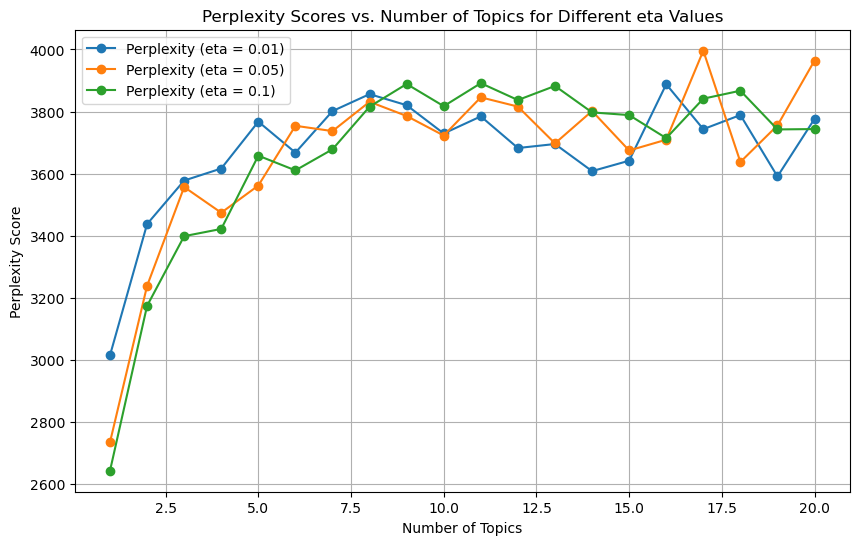

------------------------------------------------
under eta value:  0.1  Optimal number of topics for highest coherence:  13
Optimal number of topics for lowest perplexity: 1


In [35]:
coherence_Alfa_Romeo_Stelvio, optimal_model_Alfa_Romeo_Stelvio, all_coherence_Alfa_Romeo_Stelvio = result(corpus_Alfa_Romeo_Stelvio)

In [36]:
# Save the optimal model
optimal_model_Alfa_Romeo_Stelvio.save("mdl_Alfa_Romeo_Stelvio", True)

In [114]:
optimal_model_Alfa_Romeo_Stelvio = tp.LDAModel.load("mdl_Alfa_Romeo_Stelvio")

In [116]:
# Call the function
prepared_data = visualize_lda_model(optimal_model_Alfa_Romeo_Stelvio, 13)

# Display the visualization
pyLDAvis.display(prepared_data)


Preparing Data:  20%|█████▊                       | 1/5 [00:00<00:03,  1.02it/s]


In [117]:
# Loading the best model
best_mdl = tp.LDAModel.load("mdl_Alfa_Romeo_Stelvio")

# Create an empty DataFrame to store topic-word distribution
topic_words_df = pd.DataFrame(columns=["Topic"] + [f"Word_{i}" for i in range(1, 25)])

# Get the topic-word distribution and store the top 24 words for each topic
for topic_id in range(best_mdl.k):
    topic_words = best_mdl.get_topic_words(topic_id, top_n=24)
    words = [word for word, _ in topic_words]
    topic_words_df.loc[len(topic_words_df)] = [topic_id + 1] + words

# Define the keywords_analyze function
def keywords_analyze(optimal_num, topic_words_df):
    console = Console()
    table = Table(
        show_header=True,
        header_style="cyan",
        title="[bold] [cyan] Word to topic (top 10 words)[/cyan]",
        width=120)
    
    table.add_column("Topic", justify="center", style="cyan", width=8)
    for i in range(1, 11):
        table.add_column(f"W {i}", width=12)
        
    for k in range(optimal_num):
        values = topic_words_df.iloc[k, 1:11].tolist()
        table.add_row(str(k + 1), *values)
        
    console.print(table)
    return table

# Call the function for keyword analysis
table = keywords_analyze(best_mdl.k, topic_words_df)

                                               Word to topic (top 10 words)                                        
┏━━━━━━┳━━━━━━━━━━┳━━━━━━━━━━┳━━━━━━━━━━┳━━━━━━━━━━┳━━━━━━━━━━┳━━━━━━━━━━┳━━━━━━━━━━┳━━━━━━━━━━━┳━━━━━━━━━━┳━━━━━━━
┃ Top… ┃ W 1      ┃ W 2      ┃ W 3      ┃ W 4      ┃ W 5      ┃ W 6      ┃ W 7      ┃ W 8       ┃ W 9      ┃ W 10  
┡━━━━━━╇━━━━━━━━━━╇━━━━━━━━━━╇━━━━━━━━━━╇━━━━━━━━━━╇━━━━━━━━━━╇━━━━━━━━━━╇━━━━━━━━━━╇━━━━━━━━━━━╇━━━━━━━━━━╇━━━━━━━
│  1   │ red      │ blue     │ black    │ plate    │ tapatalk │ saw      │ white    │ road      │ today    │ park  
│  2   │ rear     │ front    │ side     │ plate    │ wheel    │ fit      │ door     │ bit       │ black    │ part  
│  3   │ roof     │ bar      │ bike     │ tow      │ rail     │ fit      │ wheel    │ boot      │ way      │ box   
│  4   │ updat    │ map      │ connect  │ version  │ phone    │ softwar  │ infotain │ system    │ tri      │ thank 
│  5   │ last     │ day      │ coupl    │ park     │ ok       │ spain    │ saw      │ stelvia   │ week     │ three 
│  6   │ price    │ option   │ spec     │ wheel    │ milano   │ model    │ special  │ seat      │ romeo    │ part  
│  7   │ tyre     │ winter   │ brake    │ rear     │ wheel    │ pad      │ snow     │ front     │ disc     │ road  
│  8   │ jeep     │ grand    │ want     │ sort     │ lol      │ cazzo    │ che      │ could     │ cheroke  │ given 
│  9   │ review   │ sound    │ love     │ romeo    │ suv      │ video    │ guy      │ best      │ great    │ quadri
│  10  │ servic   │ week     │ month    │ last     │ back     │ mine     │ mile     │ first     │ warranti │ could 
│  11  │ batteri  │ charg    │ start    │ issu     │ lock     │ key      │ problem  │ replac    │ connect  │ open  
│  12  │ light    │ engin    │ brake    │ mode     │ sound    │ turn     │ start    │ oil       │ chang    │ stop  
│  13  │ much     │ suv      │ better   │ make     │ realli   │ seem     │ bit      │ diesel    │ even     │ though
└──────┴──────────┴──────────┴──────────┴──────────┴──────────┴──────────┴──────────┴───────────┴──────────┴───────

In [118]:
best_mdl = tp.LDAModel.load("mdl_Alfa_Romeo_Stelvio")                             # step 1
td = pd.DataFrame(                                                # step 2
        np.stack([doc.get_topic_dist() for doc in best_mdl.docs]),
        columns=["topic_{}".format(i + 1) for i in range(best_mdl.k)],
    )

# Find the topic with the maximum probability for each row
td["max_topic"] = td.iloc[:, :-1].idxmax(axis=1)  # Find the column name with max value

# Extract the numeric part from the "topic_" column name
td["topic_Alfa_Romeo_Stelvio"] = td["max_topic"].str.split("_", expand=True)[1].astype(int)


# Add the 'topic_overall' column to the original DataFrame 'df'
df["topic_Alfa_Romeo_Stelvio"] = td["topic_Alfa_Romeo_Stelvio"]

# Print the updated DataFrame
print(df)

       Unnamed: 0                                            Comment  \
0             1.0  I'm not sure I have ever commented on a video,...   
1             2.0  I’ve always done the cup holder test in all my...   
2             3.0  I absolutely love the design of the Stelvio an...   
3             4.0  I believe the reason behind the column mounted...   
4             5.0  Finally! As a previous 4C Spider and now Giuli...   
...           ...                                                ...   
60678         NaN  I suppose we should be grateful that at least ...   
60679         NaN  Our first macan was a base on 21s with no Pasm...   
60680         NaN  For gen3, on the uk configurator PASM is not c...   
60681         NaN  Well that is another reason for avoiding the 2...   
60682         NaN  We don’t do too bad. At current exchange rates...   

                           Name       Date    Pos    Neg    Neu  \
0      \n @charlesconnor1737\n  2020-08-29  0.207  0.070  0.723   
1

In [119]:
# Calculate the average sentiment score for each label in the 'topic_overall' column
average_sentiment_by_topic = df.groupby('topic_Alfa_Romeo_Stelvio')['sentiment_score'].mean()

# Print the calculated average sentiment scores
print(average_sentiment_by_topic)

topic_Alfa_Romeo_Stelvio
1.0     2.914671
2.0     3.239399
3.0     3.111111
4.0     3.242003
5.0     2.885350
6.0     3.275862
7.0     3.060241
8.0     3.142857
9.0     3.329221
10.0    3.169436
11.0    3.196517
12.0    3.224059
Name: sentiment_score, dtype: float64


## 5.3.3 porsche

In [120]:
Porsche_Macan_comments = df[df['Model'] == 'Porsche Macan']['Processed_Comment']

In [121]:
corpus_Porsche_Macan = convert_review_to_corpus(Porsche_Macan_comments)

In [122]:
mdl_Porsche_Macan = modeling(corpus_Porsche_Macan)

Num docs:20975, Num Vocabs:4607, Total Words:325833
Removed Top words:  macan
Iteration: 0000, LL per word: -11.51
Iteration: 0020, LL per word: -8.424
Iteration: 0040, LL per word: -8.188
Iteration: 0060, LL per word: -8.097
Iteration: 0080, LL per word: -8.034
Iteration: 0100, LL per word: -7.995
Iteration: 0120, LL per word: -7.964
Iteration: 0140, LL per word: -7.944
Iteration: 0160, LL per word: -7.929
Iteration: 0180, LL per word: -7.918
Iteration: 0200, LL per word: -7.912
Iteration: 0220, LL per word: -7.901
Iteration: 0240, LL per word: -7.895
Iteration: 0260, LL per word: -7.887
Iteration: 0280, LL per word: -7.88
Iteration: 0300, LL per word: -7.876
Iteration: 0320, LL per word: -7.871
Iteration: 0340, LL per word: -7.868
Iteration: 0360, LL per word: -7.862
Iteration: 0380, LL per word: -7.857
Iteration: 0400, LL per word: -7.854
Iteration: 0420, LL per word: -7.847
Iteration: 0440, LL per word: -7.838
Iteration: 0460, LL per word: -7.838
Iteration: 0480, LL per word: -7.83

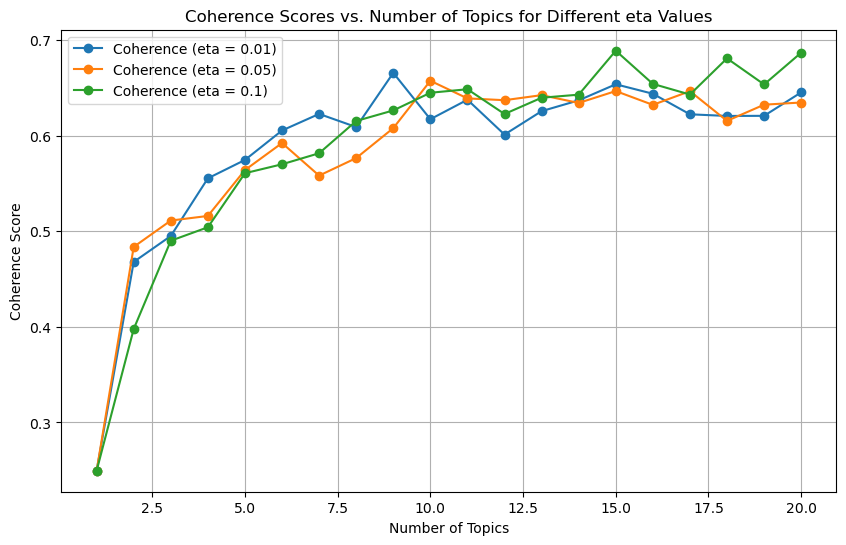

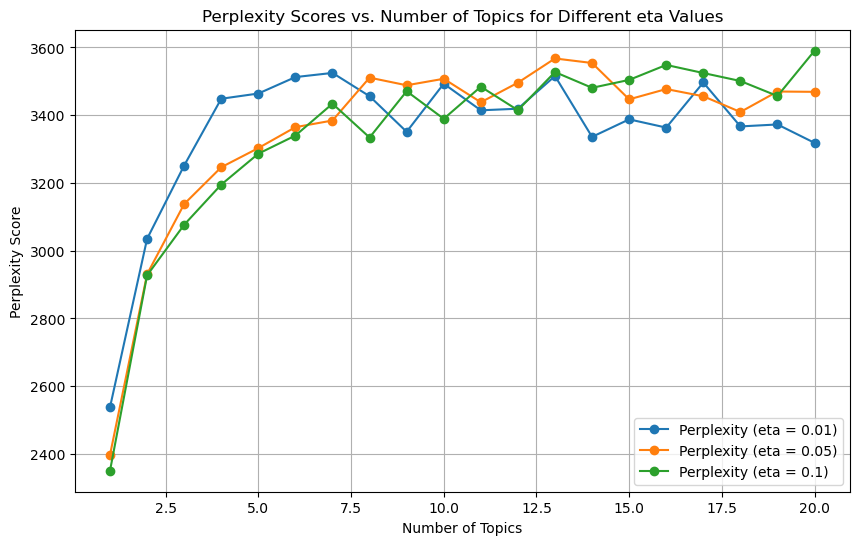

------------------------------------------------
under eta value:  0.1  Optimal number of topics for highest coherence:  15
Optimal number of topics for lowest perplexity: 1


In [123]:
coherence_Porsche_Macan, optimal_model_Porsche_Macan, all_coherence_Porsche_Macan = result(corpus_Porsche_Macan)

In [124]:
# Save the optimal model
optimal_model_Porsche_Macan.save("mdl_Porsche_Macan", True)

In [125]:
optimal_model_Porsche_Macan = tp.LDAModel.load("mdl_Porsche_Macan")

In [129]:
# Call the function
prepared_data = visualize_lda_model(optimal_model_Porsche_Macan, 15)

# Display the visualization
pyLDAvis.display(prepared_data)

Preparing Data:  20%|█████▊                       | 1/5 [00:01<00:05,  1.29s/it]


In [130]:
# Loading the best model
best_mdl = tp.LDAModel.load("mdl_Porsche_Macan")

# Create an empty DataFrame to store topic-word distribution
topic_words_df = pd.DataFrame(columns=["Topic"] + [f"Word_{i}" for i in range(1, 25)])

# Get the topic-word distribution and store the top 24 words for each topic
for topic_id in range(best_mdl.k):
    topic_words = best_mdl.get_topic_words(topic_id, top_n=24)
    words = [word for word, _ in topic_words]
    topic_words_df.loc[len(topic_words_df)] = [topic_id + 1] + words

# Define the keywords_analyze function
def keywords_analyze(optimal_num, topic_words_df):
    console = Console()
    table = Table(
        show_header=True,
        header_style="cyan",
        title="[bold] [cyan] Word to topic (top 10 words)[/cyan]",
        width=120)
    
    table.add_column("Topic", justify="center", style="cyan", width=8)
    for i in range(1, 11):
        table.add_column(f"W {i}", width=12)
        
    for k in range(optimal_num):
        values = topic_words_df.iloc[k, 1:11].tolist()
        table.add_row(str(k + 1), *values)
        
    console.print(table)
    return table

# Call the function for keyword analysis
table = keywords_analyze(best_mdl.k, topic_words_df)

                                               Word to topic (top 10 words)                                        
┏━━━━━━┳━━━━━━━━━━┳━━━━━━━━━━┳━━━━━━━━━━┳━━━━━━━━━━┳━━━━━━━━━━┳━━━━━━━━━━┳━━━━━━━━━━┳━━━━━━━━━━━┳━━━━━━━━━━┳━━━━━━━
┃ Top… ┃ W 1      ┃ W 2      ┃ W 3      ┃ W 4      ┃ W 5      ┃ W 6      ┃ W 7      ┃ W 8       ┃ W 9      ┃ W 10  
┡━━━━━━╇━━━━━━━━━━╇━━━━━━━━━━╇━━━━━━━━━━╇━━━━━━━━━━╇━━━━━━━━━━╇━━━━━━━━━━╇━━━━━━━━━━╇━━━━━━━━━━━╇━━━━━━━━━━╇━━━━━━━
│  1   │ oil      │ chang    │ mile     │ connect  │ work     │ app      │ month    │ first     │ done     │ phone 
│  2   │ coat     │ wash     │ clean    │ detail   │ ceram    │ water    │ gtechniq │ appli     │ paint    │ remov 
│  3   │ engin    │ turbo    │ suv      │ better   │ model    │ buy      │ audi     │ want      │ realli   │ differ
│  4   │ mile     │ fuel     │ around   │ mpg      │ trip     │ run      │ road     │ motorway  │ averag   │ journe
│  5   │ seat     │ way      │ standard │ option   │ air      │ bose     │ wheel    │ suspens   │ spec     │ comfor
│  6   │ colour   │ black    │ wheel    │ leather  │ red      │ interior │ grey     │ spec      │ great    │ love  
│  7   │ review   │ video    │ great    │ love     │ rori     │ thank    │ pleas    │ watch     │ matt     │ mat   
│  8   │ ford     │ puma     │ maserati │ front    │ design   │ alfa     │ grecal   │ ugli      │ stelvio  │ swift 
│  9   │ day      │ know     │ got      │ thank    │ week     │ ask      │ take     │ first     │ issu     │ order 
│  10  │ rear     │ light    │ front    │ door     │ park     │ side     │ seat     │ fit       │ button   │ heat  
│  11  │ price    │ cost     │ buy      │ option   │ pay      │ money    │ spec     │ valu      │ want     │ sell  
│  12  │ insur    │ quot     │ compani  │ admir    │ polici   │ cover    │ cost     │ claim     │ lv       │ option
│  13  │ ev       │ batteri  │ charg    │ ice      │ electr   │ rang     │ tesla    │ uk        │ power    │ vehicl
│  14  │ warranti │ tyre     │ winter   │ wheel    │ mile     │ extend   │ set      │ replac    │ cost     │ fit   
│  15  │ sport    │ speed    │ set      │ mode     │ button   │ brake    │ turn     │ control   │ engin    │ manual
└──────┴──────────┴──────────┴──────────┴──────────┴──────────┴──────────┴──────────┴───────────┴──────────┴───────

In [131]:
best_mdl = tp.LDAModel.load("mdl_Porsche_Macan")                             # step 1
td = pd.DataFrame(                                                # step 2
        np.stack([doc.get_topic_dist() for doc in best_mdl.docs]),
        columns=["topic_{}".format(i + 1) for i in range(best_mdl.k)],
    )

# Find the topic with the maximum probability for each row
td["max_topic"] = td.iloc[:, :-1].idxmax(axis=1)  # Find the column name with max value

# Extract the numeric part from the "topic_" column name
td["topic_Porsche_Macan"] = td["max_topic"].str.split("_", expand=True)[1].astype(int)


# Add the 'topic_overall' column to the original DataFrame 'df'
df["topic_Porsche_Macan"] = td["topic_Porsche_Macan"]

# Print the updated DataFrame
print(df)

       Unnamed: 0                                            Comment  \
0             1.0  I'm not sure I have ever commented on a video,...   
1             2.0  I’ve always done the cup holder test in all my...   
2             3.0  I absolutely love the design of the Stelvio an...   
3             4.0  I believe the reason behind the column mounted...   
4             5.0  Finally! As a previous 4C Spider and now Giuli...   
...           ...                                                ...   
60678         NaN  I suppose we should be grateful that at least ...   
60679         NaN  Our first macan was a base on 21s with no Pasm...   
60680         NaN  For gen3, on the uk configurator PASM is not c...   
60681         NaN  Well that is another reason for avoiding the 2...   
60682         NaN  We don’t do too bad. At current exchange rates...   

                           Name       Date    Pos    Neg    Neu  \
0      \n @charlesconnor1737\n  2020-08-29  0.207  0.070  0.723   
1

In [132]:
# Calculate the average sentiment score for each label in the 'topic_overall' column
average_sentiment_by_topic = df.groupby('topic_Porsche_Macan')['sentiment_score'].mean()

# Print the calculated average sentiment scores
print(average_sentiment_by_topic)

topic_Porsche_Macan
1.0     3.035163
2.0     2.967568
3.0     3.141095
4.0     2.909193
5.0     2.952141
6.0     3.018471
7.0     3.156121
8.0     3.224000
9.0     3.020582
10.0    3.050868
11.0    3.006369
12.0    3.039936
13.0    2.869379
14.0    3.057393
Name: sentiment_score, dtype: float64


## 5.3.4 Theme Comparison

In [192]:

# Define themes with associated keywords
THEMES = {
    "Performance & Handling": ['drive', 'engine', 'performance', 'handling', 'acceleration', 'gear', 'transmission', 'power', 'torque', 'speed'],
    "Design & Interior": ['door', 'seat', 'interior', 'exterior', 'wheel', 'tyre', 'look', 'design', 'style', 'leather', 'upholstery', 'dashboard', 'console', 'color', 'finish', 'paint', 'material', 'luxury', 'space', ],
    'Comfort_convenience': ['comfort', 'legroom', 'headspace', 'climate', 'control', 'cruise', 'adjust', 'heated', 'ventilated', 'sunroof', 'ambient', 'lighting', 'quiet', 'smooth', 'ergonomic', 'easy', 'remote', 'start', 'auto', 'mode'],
    "Connectivity & Tech Features": ['phone', 'charger', 'app', 'bluetooth', 'touchscreen', 'voice command', 'AI', 'interface', 'navigation', 'GPS'],
    "Pricing & Value": ['price', 'value', 'cost', 'msrp', 'expensive', 'affordable', 'worth', 'overpriced', 'discount', 'finance'],
    "Brand & Perception": ['brand', 'reputation', 'comparison', 'trusted', 'recognized', 'premium', 'luxury', 'heritage', 'legacy', 'economical'],
    "Safety Features": ['safety', 'airbag', 'crash test', 'sensor', 'lane alert', 'park assist', 'ABS', 'stability', 'blind spot', 'emergency braking'],
    "Reliability & Service": ['reliable', 'durable', 'warranty', 'maintenance', 'longevity', 'dependable', 'service centre', 'help', 'response', 'feedback', 'dealership', 'dealer', 'service appointment', 'courtesy car', 'service advisor', 'parts', 'warranty service', 'scheduled maintenance', 'recall service', 'diagnostic', 'inspection', 'repair', 'oil change', 'tire rotation', 'service quote', 'invoice', 'booking', 'mechanic', 'workshop']
}

def categorize(input_text):
    """Categorize a given text based on themes."""
    for theme, keywords in THEMES.items():
        if any(keyword in input_text for keyword in keywords):
            return theme
    return None

# Apply categorization to the DataFrame
for theme, keywords in THEMES.items():
    df[theme] = df['Processed_Comment'].apply(lambda x: 1 if any(keyword in x for keyword in keywords) else 0)

models = ['Maserati Grecale', 'Alfa Romeo Stelvio', 'Audi Q5', 'BMW X3', 'Porsche Macan']

results_all = {}
categories = list(THEMES.keys())


In [193]:

# Compute average scores and count for each model and category
for model in models:
    model_df = df[df['Model'] == model]

    average_scores = {}
    count_scores = {}
    
    for category in categories:
        relevant_rows = model_df[model_df[category] == 1]
        average_score = relevant_rows['sentiment_score'].mean()
        count = len(relevant_rows)

        average_scores[category] = average_score
        count_scores[category] = count

    results_model = {
        'Average Sentiment Score': average_scores,
        'Count': count_scores
    }

    results_all[model] = pd.DataFrame(results_model)

# Display the results for each model
for model, result in results_all.items():
    print(f"Results for {model}:\n")
    print(result)
    print("\n" + "="*50 + "\n")




Results for Maserati Grecale:

                              Average Sentiment Score  Count
Performance & Handling                       2.892157    102
Design & Interior                            2.659091    308
Comfort_convenience                          2.741818    275
Connectivity & Tech Features                 2.676617    201
Pricing & Value                              2.720930    129
Brand & Perception                           2.720588     68
Safety Features                              2.571429      7
Reliability & Service                        2.598930    187


Results for Alfa Romeo Stelvio:

                              Average Sentiment Score  Count
Performance & Handling                       2.988016    751
Design & Interior                            3.021184   1605
Comfort_convenience                          2.878085   1337
Connectivity & Tech Features                 2.812818    983
Pricing & Value                              2.900166    601
Brand & Perception 

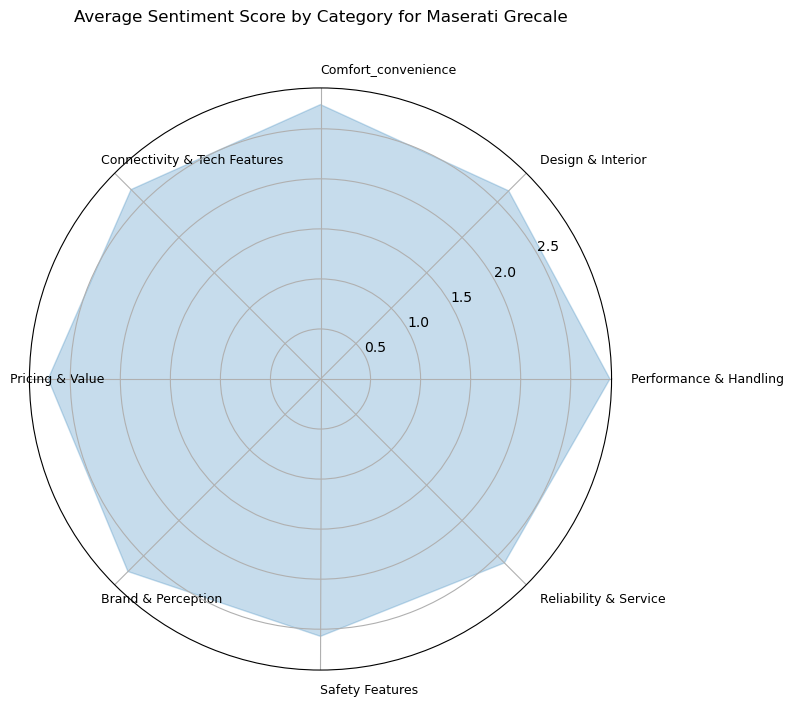

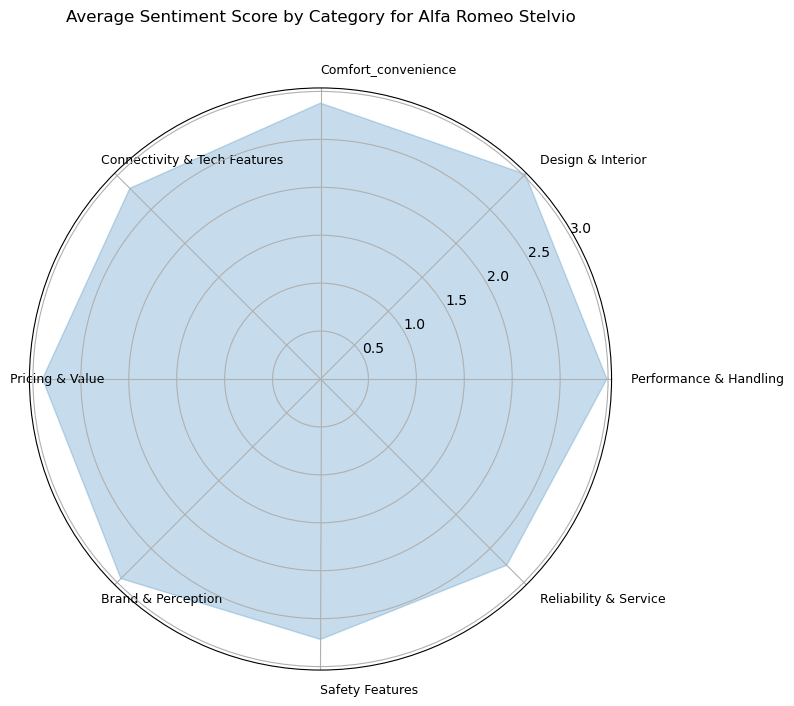

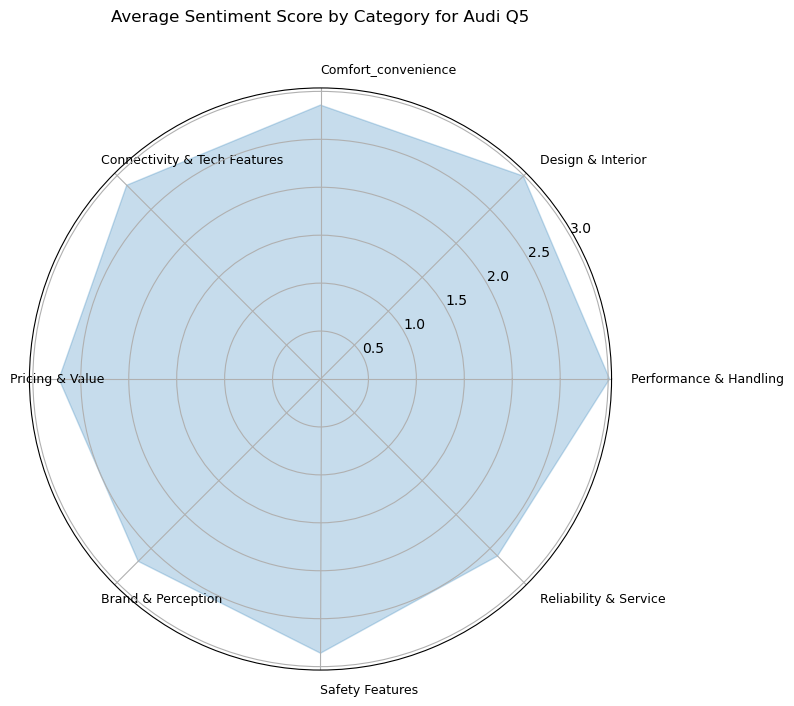

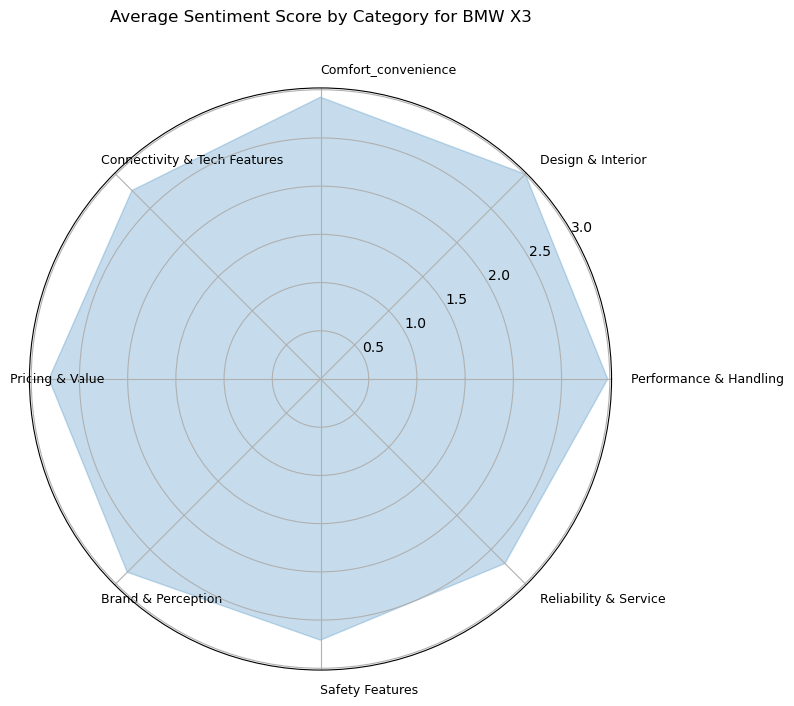

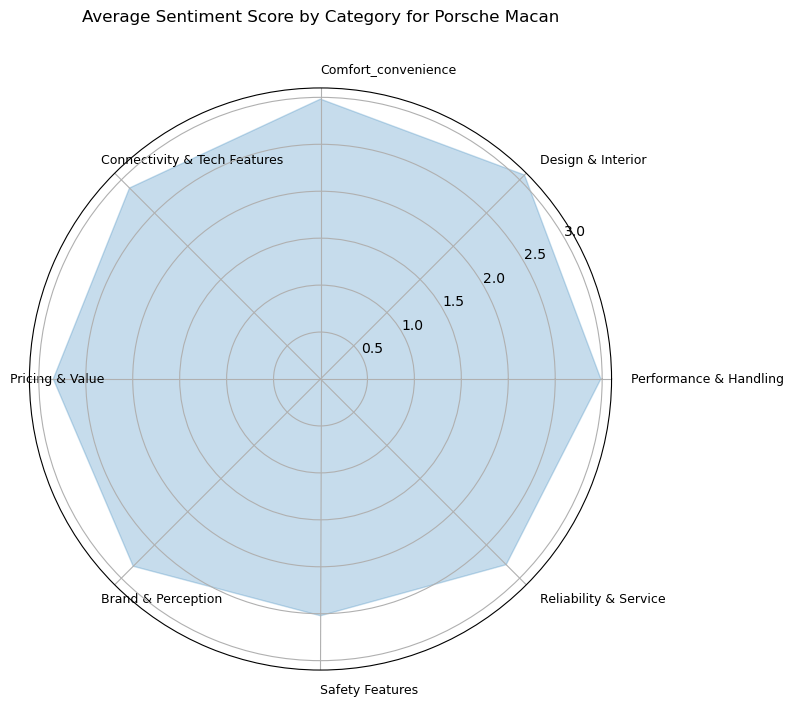

In [194]:
# Radar chart setup
labels = categories
num_vars = len(labels)
theta = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()

# Plot radar charts for each model
for model in models:
    fig, ax = plt.subplots(figsize=(8, 8), subplot_kw=dict(polar=True))
    ax.set_xticks(theta)
    ax.set_xticklabels(labels, fontsize=9, ha='left', va='center')
    
    values = [results_all[model]['Average Sentiment Score'][category] for category in categories]
    values += values[:1]  # close the circle
    theta_vals = theta + theta[:1]
    
    professional_blue = "#1f77b4"
    ax.fill(theta_vals, values, color=professional_blue, alpha=0.25)
    ax.set_title(f"Average Sentiment Score by Category for {model}", y=1.1)
    ax.set_rlabel_position(30)
    plt.tight_layout()
    plt.show()



In [195]:
# Print unique values of the "Model" column
unique_models = df_parallel['Model'].unique()
print("Unique Models:")
print(unique_models)


Unique Models:
['Maserati Grecale' 'Alfa Romeo Stelvio' 'Audi Q5' 'BMW X3'
 'Porsche Macan']


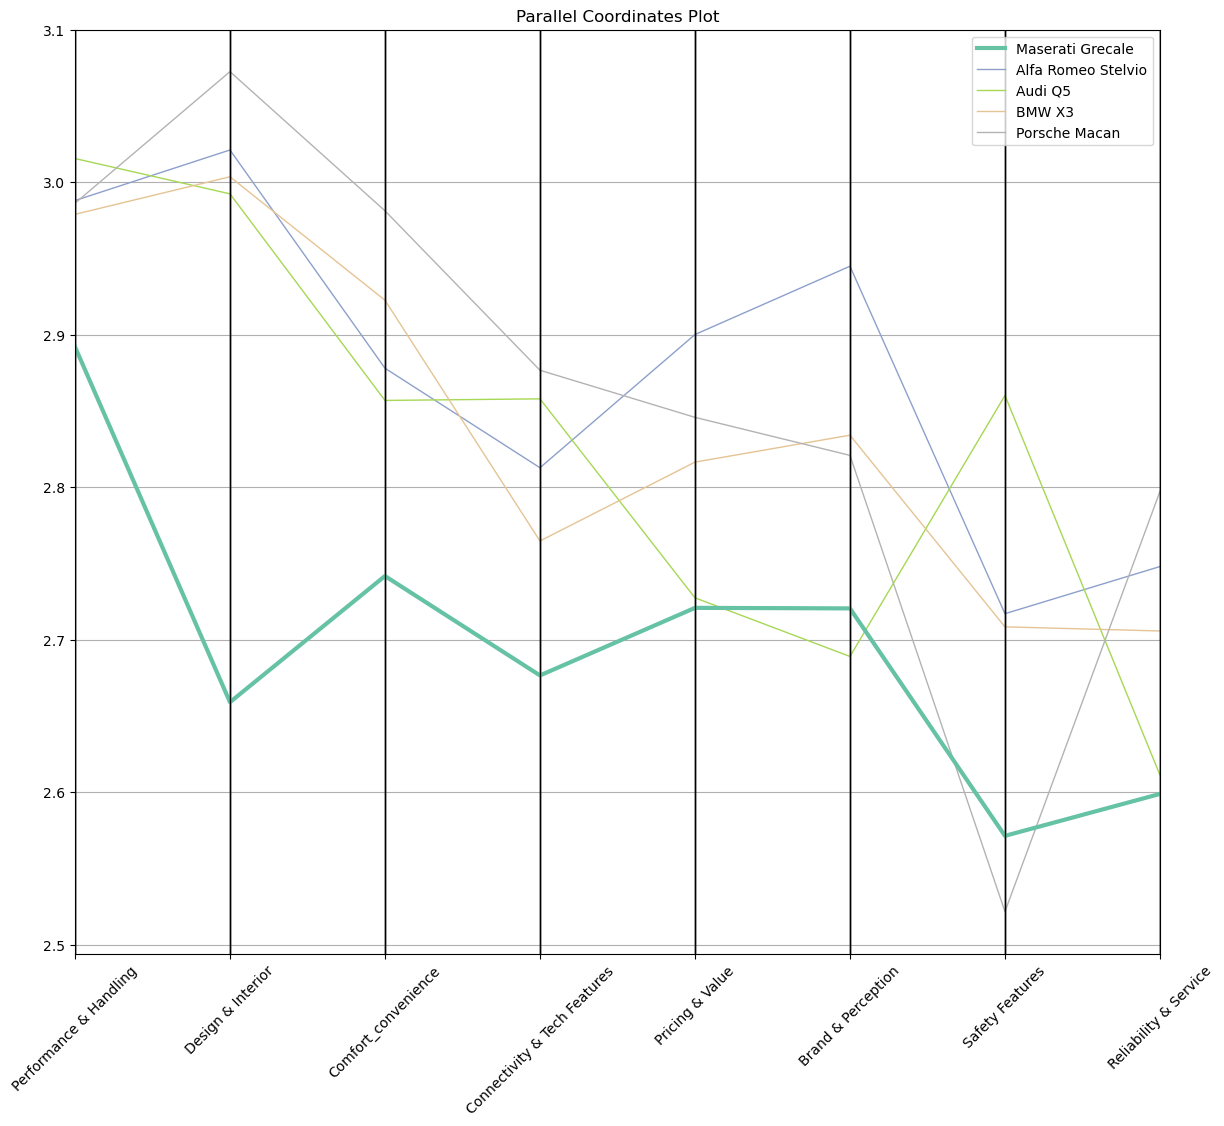

In [196]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
from pandas.plotting import parallel_coordinates  # Import the parallel_coordinates function

# Prepare data for parallel plot
data_for_parallel = {}

for model, result in results_all.items():
    data_for_parallel[model] = result['Average Sentiment Score'].to_dict()

df_parallel = pd.DataFrame(data_for_parallel).transpose().reset_index()
df_parallel.rename(columns={"index": "Model"}, inplace=True)

# Plot the parallel coordinates
plt.figure(figsize=(14, 12))

# Plot all models with thin lines
parallel_coordinates(df_parallel, 'Model', colormap=plt.get_cmap("Set2"), linewidth=1)

# Emphasize Maserati Grecale with a thicker line
df_maserati = df_parallel[df_parallel['Model'] == 'Maserati Grecale']
parallel_coordinates(df_maserati, 'Model', color=plt.get_cmap("Set2").colors[:len(df_maserati)], linewidth=3, ax=plt.gca())  # Use ax parameter

plt.title('Parallel Coordinates Plot')
plt.xticks(rotation=45)

# Remove duplicate legend entry for Maserati Grecale
handles, labels = plt.gca().get_legend_handles_labels()
by_label = dict(zip(labels, handles))
plt.legend(by_label.values(), by_label.keys(), loc='upper right')

plt.grid(True)
plt.show()
